Import all necessary library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Data Loading

In [2]:
#Read csv file
df = pd.read_csv('onlineRetail.csv')

In [3]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/2011 12:50,4.15,12680.0,France


Basic Data Understanding

In [4]:
#Check the data types of the features in df
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [5]:
#Calculate the statistical information of df
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


Descriptive Statistics

In [6]:
#Create a column calles 'TotalSales'
df['TotalSales'] = df['Quantity'] * df['UnitPrice']

In [7]:
#Calculate the statistical information for the TotalSales
df['TotalSales'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalSales, dtype: float64

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom,20.34


Descriptive Statistics for InvoiceNo

In [9]:
#Description Statistics for InvoiceNo

#Group the Invoice based on the quantity of items sold
invoice_stats = df.groupby('InvoiceNo')['Quantity'].sum().reset_index()
#Calculate the total number of Invoice
total_invoice = df['InvoiceNo'].nunique()

#Print the information found
print("Descriptive Statistics for InvoiceNo")
print("====================================")
print("Mode: ", df['InvoiceNo'].mode()[0])
print("Total Invoice: ", total_invoice)
print("====================================")
print(invoice_stats.head())

Descriptive Statistics for InvoiceNo
Mode:  573585
Total Invoice:  25900
  InvoiceNo  Quantity
0    536365        40
1    536366        12
2    536367        83
3    536368        15
4    536369         3


Descriptive Statistics for StockCode

In [10]:
#Descriptive Statistics for StockCode

#Group the StockCode by quantity of items sold
stockCode_stats = df.groupby('StockCode')['Quantity'].sum().reset_index()
#Calculate the total number of stock
total_stock = df['StockCode'].nunique()

#Print the information found for the StockCode
print("Descriptive Statistics for Stock")
print("====================================")
print("Mode: ", df['StockCode'].mode()[0])
print("Total Stock: ", total_stock)
print("====================================")
print(stockCode_stats.head())

Descriptive Statistics for Stock
Mode:  85123A
Total Stock:  4070
  StockCode  Quantity
0     10002      1037
1     10080       495
2     10120       193
3    10123C       -13
4    10123G       -38


Descriptive Statistics for Description

In [11]:
#Descriptive Statistics for Description

#Group the description  by the quantity of items sold
description_stats = df.groupby('Description')['Quantity'].sum().reset_index()
#Calculate the total number of stock
total_items = df['Description'].nunique()

#Print the information found for the stock
print("Descriptive Statistics for Stock (Name)")
print("========================================")
print("Mode: ", df['Description'].mode()[0])
print("Total Stock: ", total_stock)
print("========================================")
print(description_stats.head())

Descriptive Statistics for Stock (Name)
Mode:  WHITE HANGING HEART T-LIGHT HOLDER
Total Stock:  4070
                      Description  Quantity
0   4 PURPLE FLOCK DINNER CANDLES       144
1   50'S CHRISTMAS GIFT BAG LARGE      1913
2               DOLLY GIRL BEAKER      2448
3     I LOVE LONDON MINI BACKPACK       389
4     I LOVE LONDON MINI RUCKSACK         1


Descriptive Statistics for CustomerID

In [12]:
#Descriptive statistics for CustomerID

#Group the customer by the total quantity of items sold
customer_stats = df.groupby('CustomerID')['Quantity'].sum().reset_index()
#Calculate the total number of customer
total_customer = df['CustomerID'].nunique()

#Print the information found for the customer
print("Descriptive Statistics for Customer")
print("======================================")
print("Mode: ", df['CustomerID'].mode()[0])
print("Total Customer: ", total_customer)
print("======================================")
print(customer_stats.head())

Descriptive Statistics for Customer
Mode:  17841.0
Total Customer:  4372
   CustomerID  Quantity
0     12346.0         0
1     12347.0      2458
2     12348.0      2341
3     12349.0       631
4     12350.0       197


Descriptive Statistivs for Country

In [13]:
#Descriptive statistics for country

#Group the country by the quantity of items sold
country_stats = df.groupby('Country')['Quantity'].sum().reset_index()
#Calculate the total quantity of items sold
total_country = df['Country'].nunique()

#Print the information found for the country
print("Descriptive Statistics for Country")
print("======================================")
print("Mode: ", df['Country'].mode()[0])
print("Total Country: ", total_country)
print("======================================")
print(country_stats.head())

Descriptive Statistics for Country
Mode:  United Kingdom
Total Country:  38
     Country  Quantity
0  Australia     83653
1    Austria      4827
2    Bahrain       260
3    Belgium     23152
4     Brazil       356


Adjust for InvoiceDate

In [14]:
#Change the InvoiceDate to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')

#Extract the year, month and day from the InvoiceDate
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day

#Generate the day of week for each of the data
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%A')

#Merge the year and month into one format (2011-12)
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [15]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalSales,Year,Month,Day,DayOfWeek,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,1,Wednesday,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,1,Wednesday,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,1,Wednesday,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,9,Friday,2011-12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,9,Friday,2011-12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,Friday,2011-12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,9,Friday,2011-12


Create new DF for correlation matrix

In [16]:
from sklearn.preprocessing import LabelEncoder

#Copy the Dataframe df
corr_df = df.copy()

#Encoding the categorical variables
corr_df['InvoiceNo'] = corr_df['InvoiceNo'].astype(str)
corr_df['InvoiceNo'] = LabelEncoder().fit_transform(corr_df['InvoiceNo'])
corr_df['InvoiceNo'] = corr_df['InvoiceNo'].astype(int)

corr_df['StockCode'] = corr_df['StockCode'].astype(str)
corr_df['StockCode'] = LabelEncoder().fit_transform(corr_df['StockCode'])
corr_df['StockCode'] = corr_df['StockCode'].astype(int)

corr_df['Description'] = corr_df['Description'].astype(str)
corr_df['Description'] = LabelEncoder().fit_transform(corr_df['Description'])
corr_df['Description'] = corr_df['Description'].astype(int)

corr_df['Country'] = corr_df['Country'].astype(str)
corr_df['Country'] = LabelEncoder().fit_transform(corr_df['Country'])
corr_df['Country'] = corr_df['Country'].astype(int)

corr_df['DayOfWeek'] = corr_df['DayOfWeek'].astype(str)
corr_df['DayOfWeek'] = LabelEncoder().fit_transform(corr_df['DayOfWeek'])
corr_df['DayOfWeek'] = corr_df['DayOfWeek'].astype(int)

corr_df['YearMonth'] = corr_df['YearMonth'].astype(str)
corr_df['YearMonth'] = LabelEncoder().fit_transform(corr_df['YearMonth'])
corr_df['YearMonth'] = corr_df['YearMonth'].astype(int)

In [17]:
#Clear the missing values
corr_df.dropna(subset = ['CustomerID'], inplace = True)

Correlation Matrix

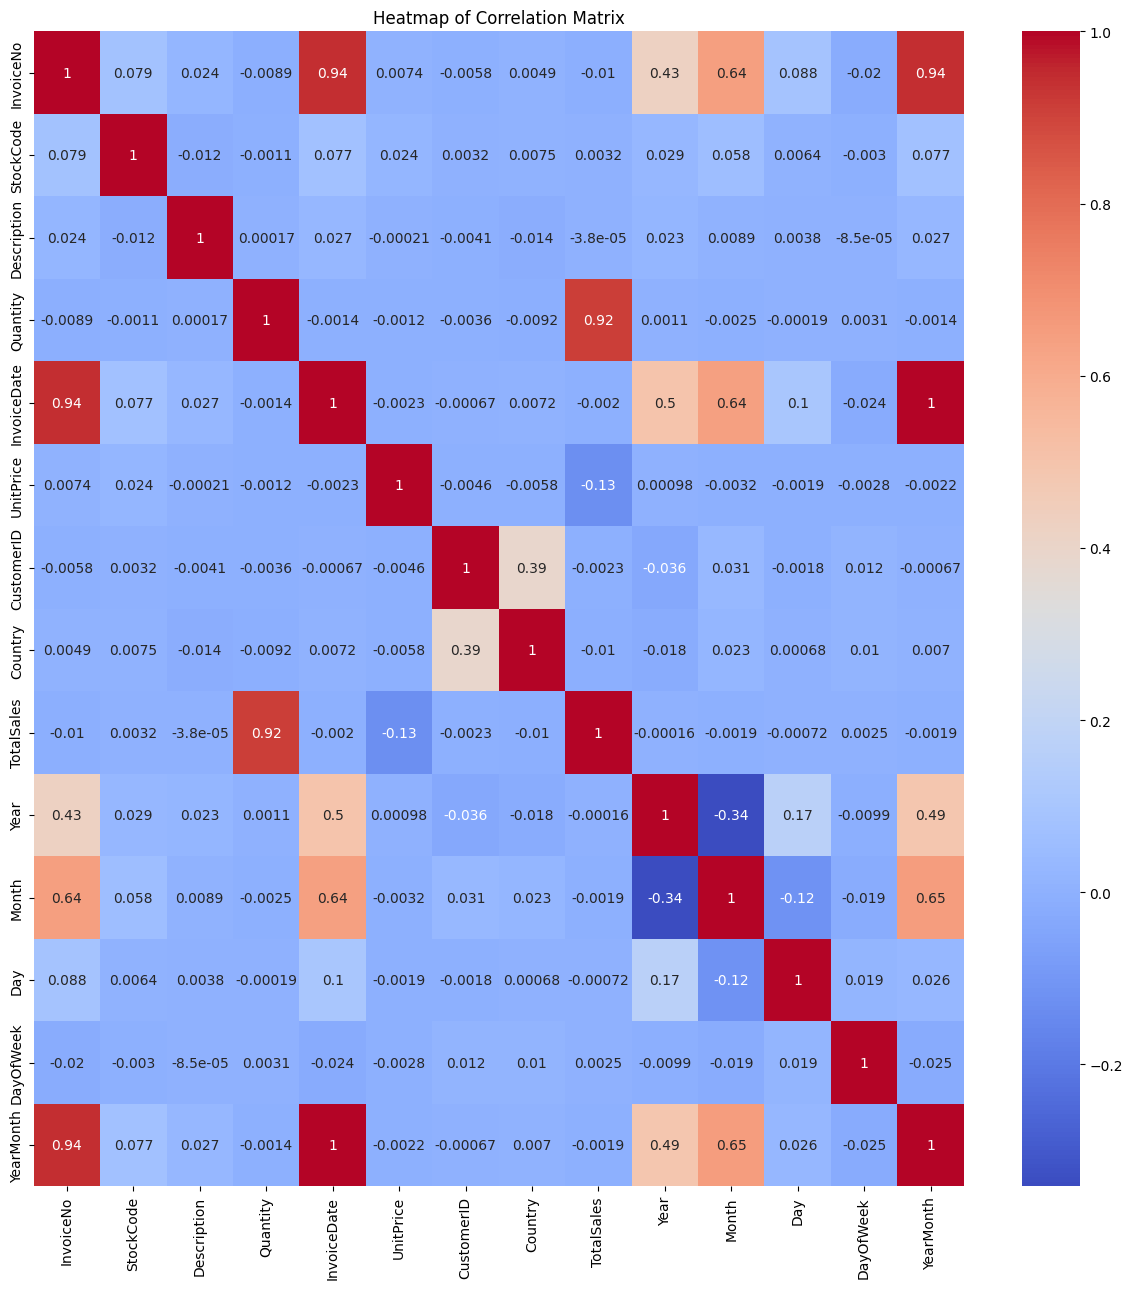

In [18]:
#Calculate the correlation for each of the features in corr_df
correlation_matrix =  corr_df.corr()

#Plot a heatmap to visualize the correlation matrix
plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap of Correlation Matrix')
plt.show()

Visualization for Invoice

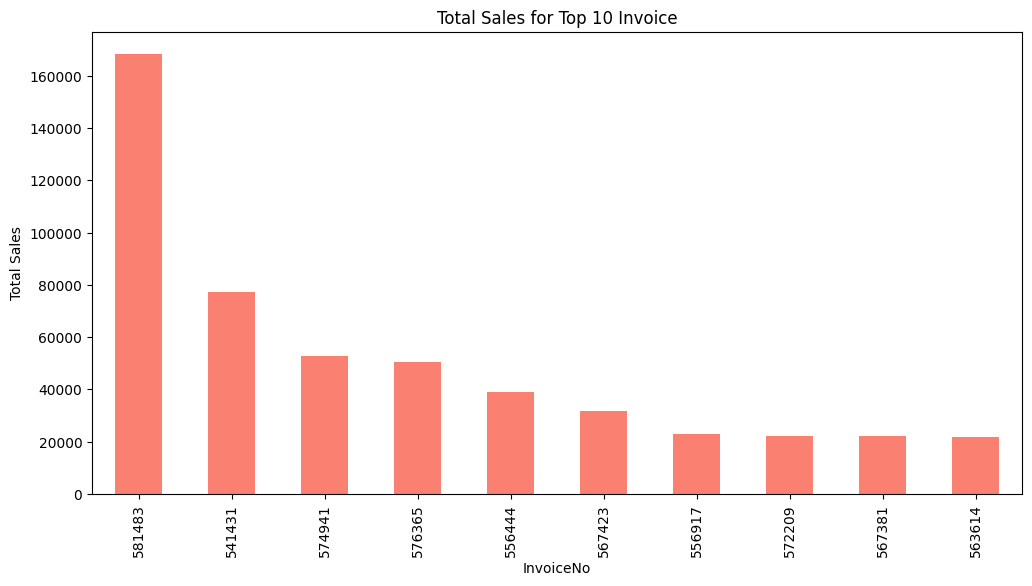

In [19]:
#Visualization for Invoice

#Calculate the total sales for each of the invoice
invoice_sales = df.groupby('InvoiceNo')['TotalSales'].sum()

#Plot the bar chart and display the top 10 highest totalsales of invoice
plt.figure(figsize=(12, 6))
invoice_sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales for Top 10 Invoice')
plt.xlabel('InvoiceNo')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Visualization for StockCode

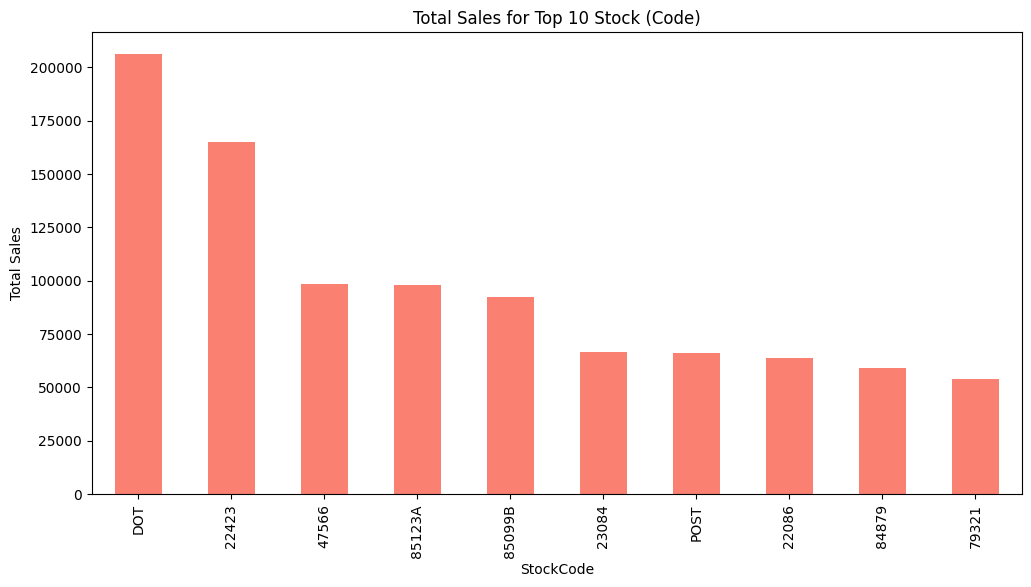

In [20]:
#Visualization for StockCode

#Calculate the total sales for each of the stock(Code)
stock_sales = df.groupby('StockCode')['TotalSales'].sum()

#Plot the bar chart and display the top 10 highest totalsales for the Stock (Code)
plt.figure(figsize=(12, 6))
stock_sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales for Top 10 Stock (Code)')
plt.xlabel('StockCode')
plt.ylabel('Total Sales')
plt.xticks(rotation=90)
plt.show()

Visualization for Description

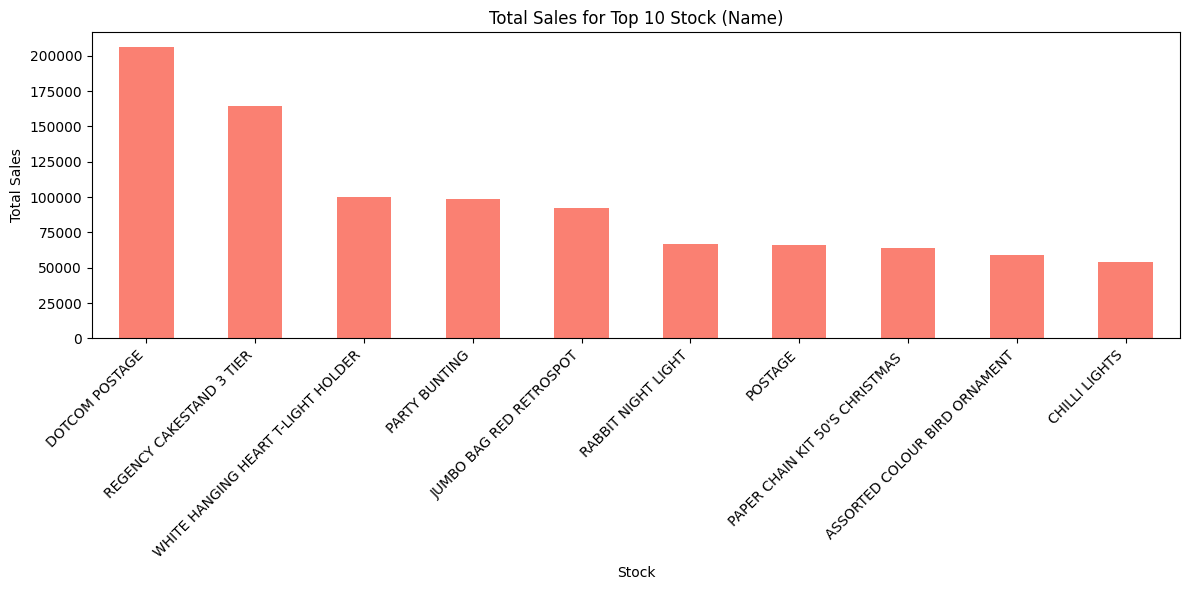

In [21]:
#Visualization for Description

#Calculate the total sales for each of the stock (name)
description_sales = df.groupby('Description')['TotalSales'].sum()

#Plot a bar chart and display the top 10 highest total sales for the Stock (name)
plt.figure(figsize=(12, 6))
description_sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales for Top 10 Stock (Name)')
plt.xlabel('Stock')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Descriptive Statistics for InvoiceDate

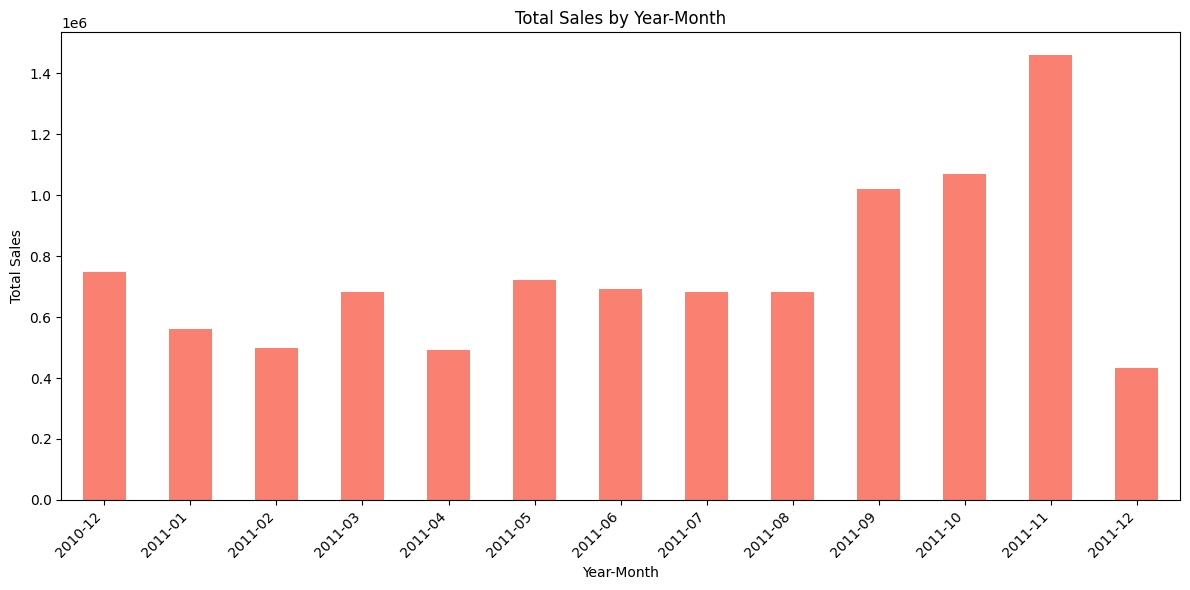

In [22]:
#Visualization for InvoiceDate

#Calculate the total sales for each of the month in 2010 and 2011
invoice_date_sales = df.groupby('YearMonth')['TotalSales'].sum()

#Plot the bar chart 
plt.figure(figsize=(12, 6))
invoice_date_sales.plot(kind='bar', color='salmon')
plt.title('Total Sales by Year-Month')
plt.xlabel('Year-Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Visualization for CustomerID

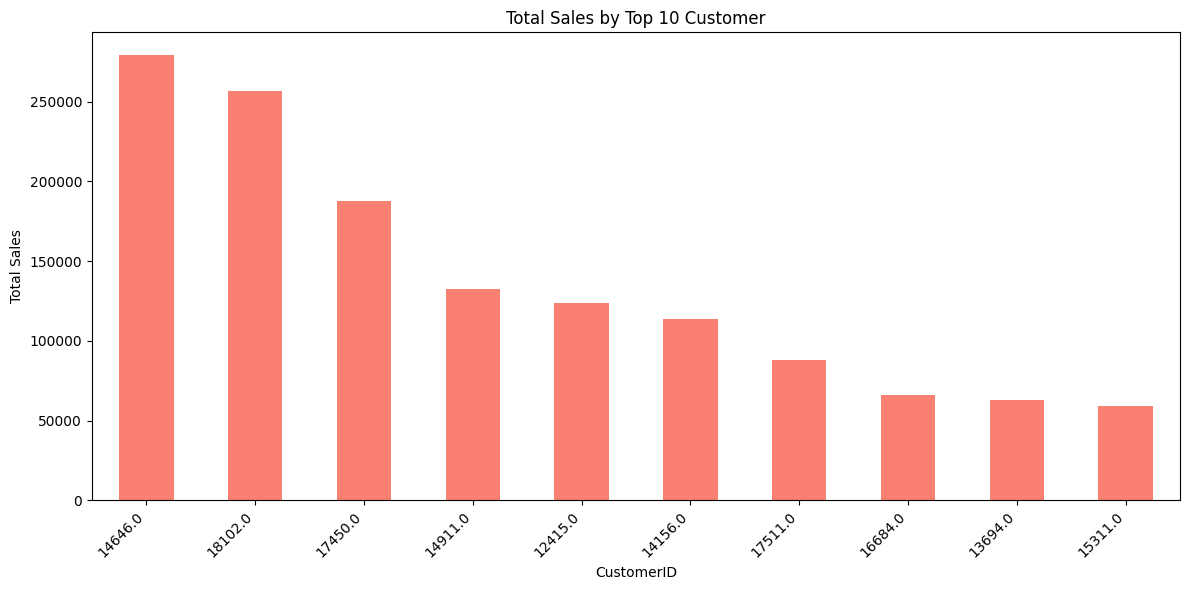

In [23]:
#Visualization for CustomerID

#Calculate the total sales for each of the customer
customer_sales = df.groupby('CustomerID')['TotalSales'].sum()

#Plot a bar chart and display the top 10 total sales by the customer
plt.figure(figsize=(12, 6))
customer_sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales by Top 10 Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Visualization for Country

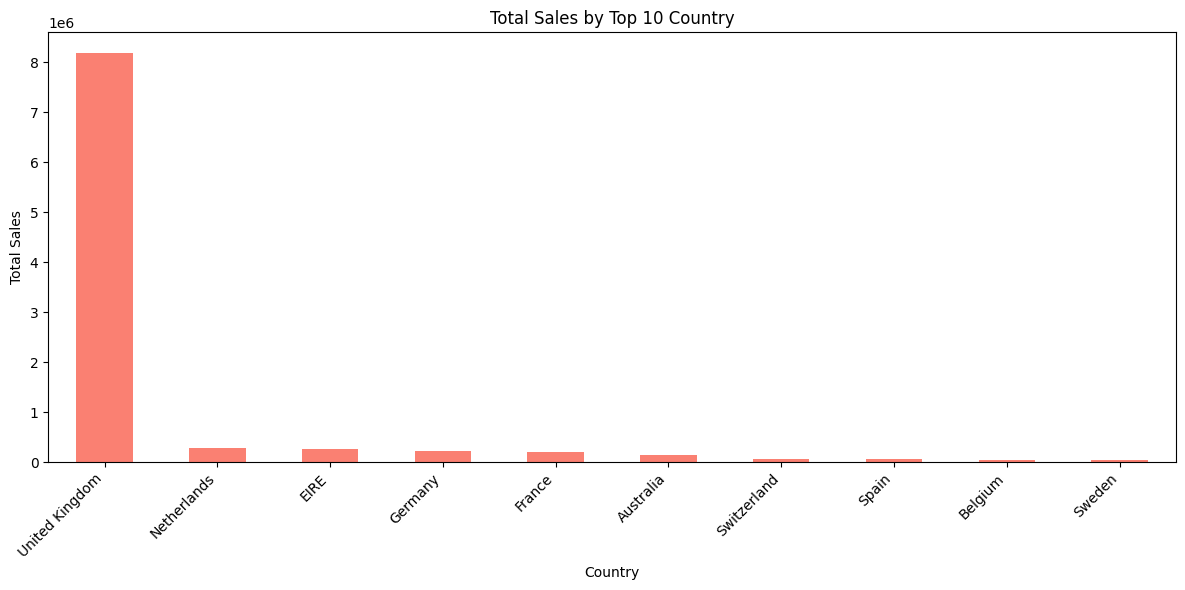

In [24]:
#Visualization for country
country_sales = df.groupby('Country')['TotalSales'].sum()

#Plot a graph and display the top 10 total sales by country
plt.figure(figsize=(12, 6))
country_sales.nlargest(10).plot(kind='bar', color='salmon')
plt.title('Total Sales by Top 10 Country')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Canceled Invoice and Non-canceled Invoice

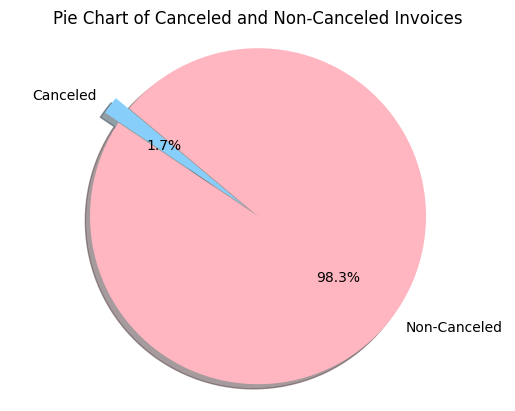

In [25]:
#Create a new column 'Canceled' to determine the canceled invoice and non-canceled invoice
df['Canceled'] = df['InvoiceNo'].str.startswith('C')

#Calculate the total number of canceled invoice and non-canceled invoice
canceled_invoice_count = df['Canceled'].sum()
non_canceled_invoice_count = (~df['Canceled']).sum()

#Plot a pie chart
labels = ['Canceled', 'Non-Canceled']
sizes = [canceled_invoice_count, non_canceled_invoice_count]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Canceled and Non-Canceled Invoices')
plt.show()

Manual Input Invoice

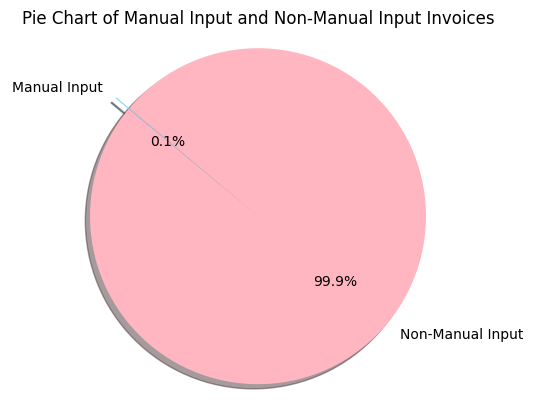

In [26]:
#Create a new column 'Manual' for the manual input invoice
df['Manual'] = df['StockCode'] == 'M'

#Calculate the total number of manual input invoice and non-manual input invoices
manual_invoice_Count = df['Manual'].sum()
non_manual_invoice_Count = (~df['Manual']).sum()

#Plot the pie chart
labels = ['Manual Input', 'Non-Manual Input']
sizes = [manual_invoice_Count, non_manual_invoice_Count]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Manual Input and Non-Manual Input Invoices')
plt.show()

Discount Given

Discount Given
Quantity of Item for Discount:  77


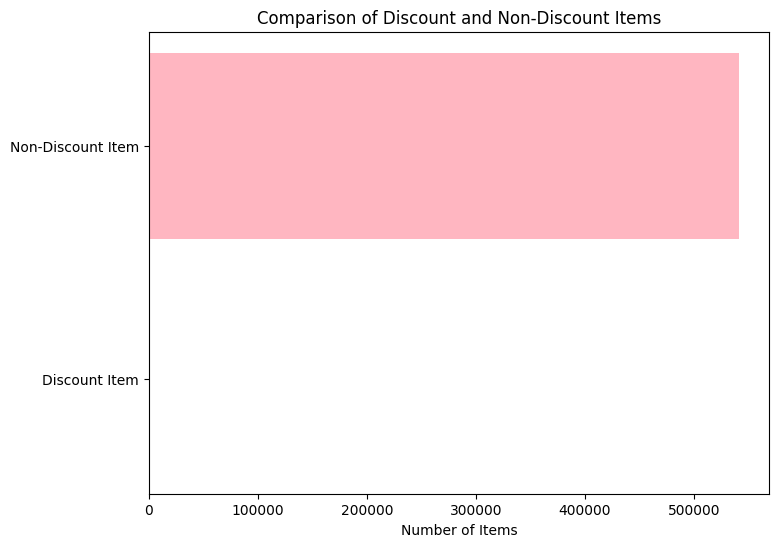

In [27]:
#Create a new column 'Discount' for the discount given in the sales
df['Discount'] = df['StockCode'] == 'D'

#Calculate the total number of discount given and non-discount invoice
discount_invoice_Count = df['Discount'].sum()
non_discount_invoice_Count = (~df['Discount']).sum()

#Print the quantity of item for discount
print("Discount Given")
print("====================================")
print("Quantity of Item for Discount: ", discount_invoice_Count)

#Plot a pie chart
labels = ['Discount Item', 'Non-Discount Item']
sizes = [discount_invoice_Count, non_discount_invoice_Count]
colors = ['lightskyblue', 'lightpink']
plt.figure(figsize=(8, 6))
plt.barh(labels, sizes, color=colors)
plt.title('Comparison of Discount and Non-Discount Items')
plt.xlabel('Number of Items')
plt.show()

Distribution of Invoices by Year

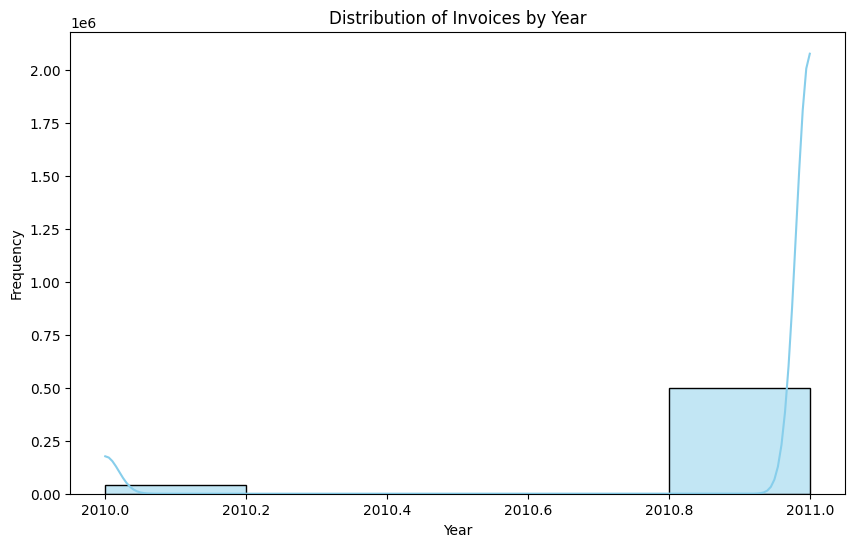

In [28]:
#Plot a graph for distribution of invoices by Year
plt.figure(figsize=(10, 6))
sns.histplot(df['Year'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

Distribution by Month

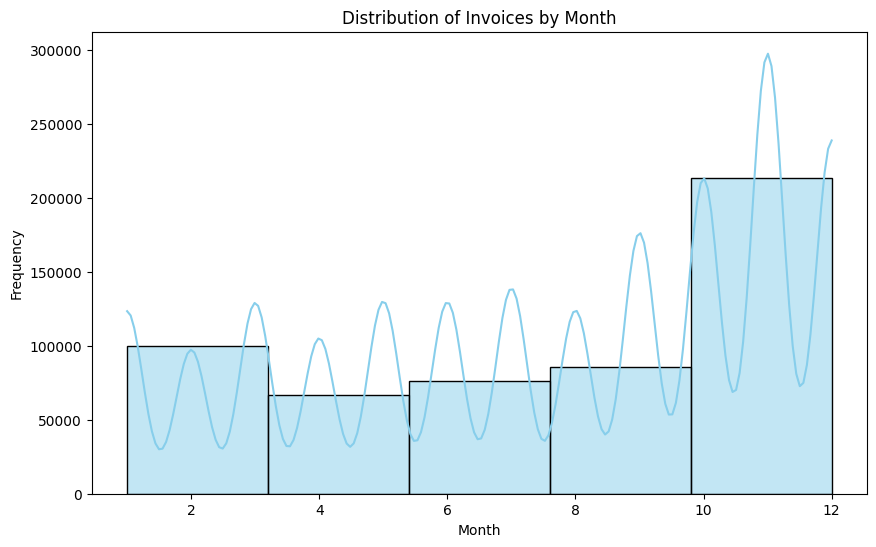

In [29]:
#Plot a graph for distribution of invoices by Month
plt.figure(figsize=(10, 6))
sns.histplot(df['Month'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Month')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.show()

Distribution by Day

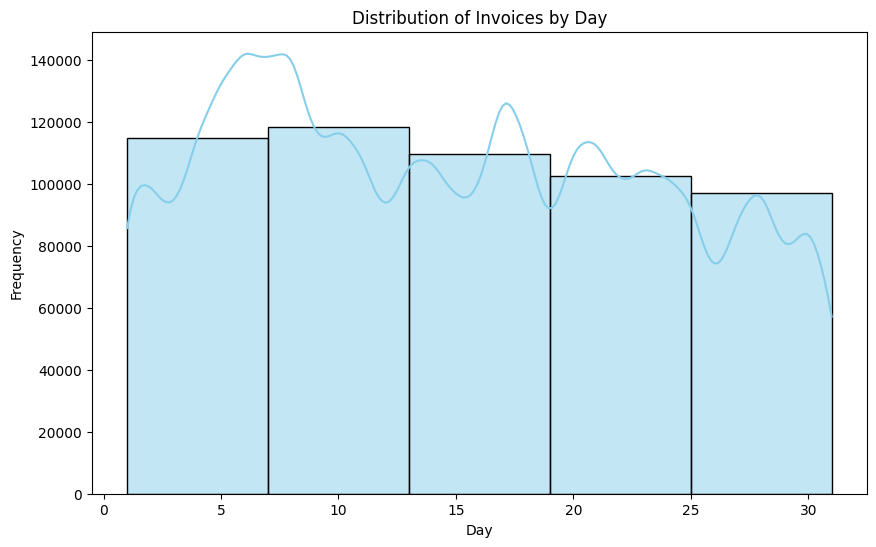

In [30]:
#Plot a graph for distribution of invoices by Day
plt.figure(figsize=(10, 6))
sns.histplot(df['Day'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by Day')
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.show()

Distribution by Day of Week

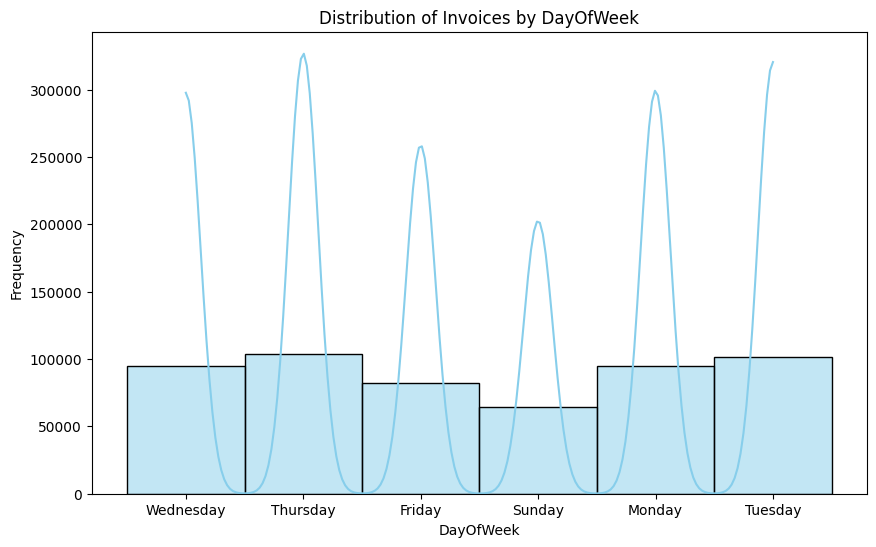

In [31]:
#Plot a graph for distribution of invoices by day of week
plt.figure(figsize=(10, 6))
sns.histplot(df['DayOfWeek'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Invoices by DayOfWeek')
plt.xlabel('DayOfWeek')
plt.ylabel('Frequency')
plt.show()

Distribution of Customer

C:\Users\User\AppData\Local\Temp\ipykernel_15028\1030434070.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='CustomerID', data=df, order=df['CustomerID'].value_counts().index, palette='coolwarm')


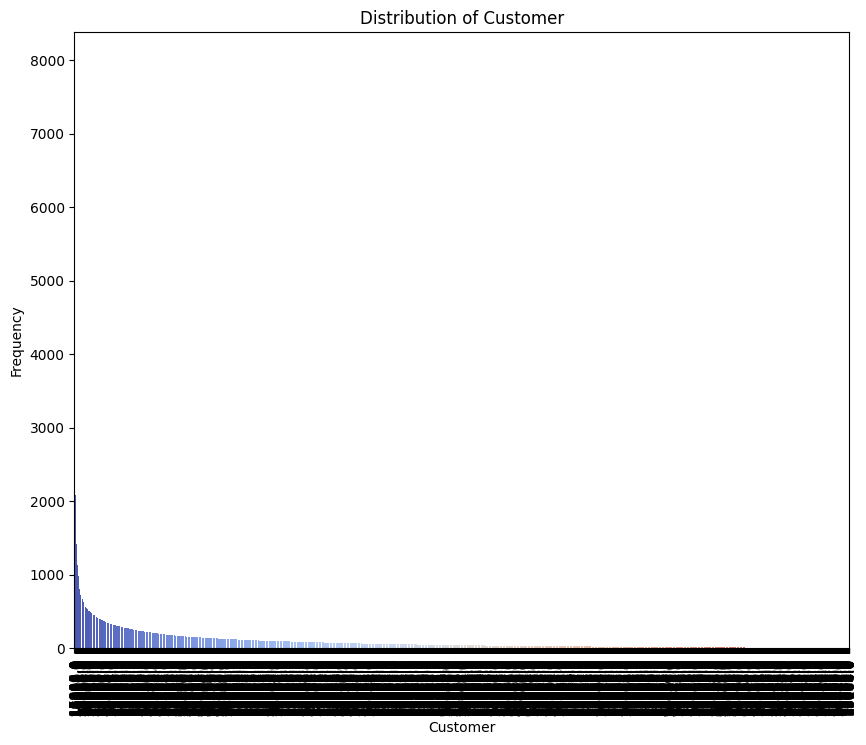

In [32]:
#Plot a graph for distribution of invoices by customer
plt.figure(figsize=(10, 8))
sns.countplot(x='CustomerID', data=df, order=df['CustomerID'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Customer')
plt.xlabel('Customer')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Distribution of Country

C:\Users\User\AppData\Local\Temp\ipykernel_15028\926907766.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='coolwarm')


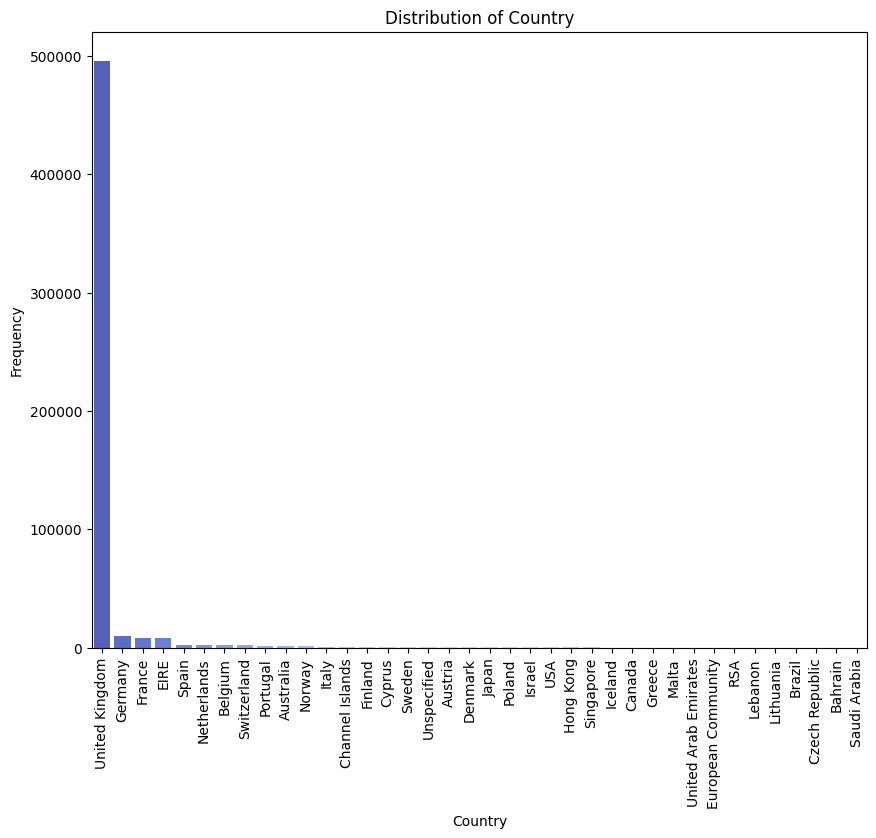

In [33]:
#Plot a graph for distribution of invoices by Country
plt.figure(figsize=(10, 8))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index, palette='coolwarm')
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

Distribution of TotalSales

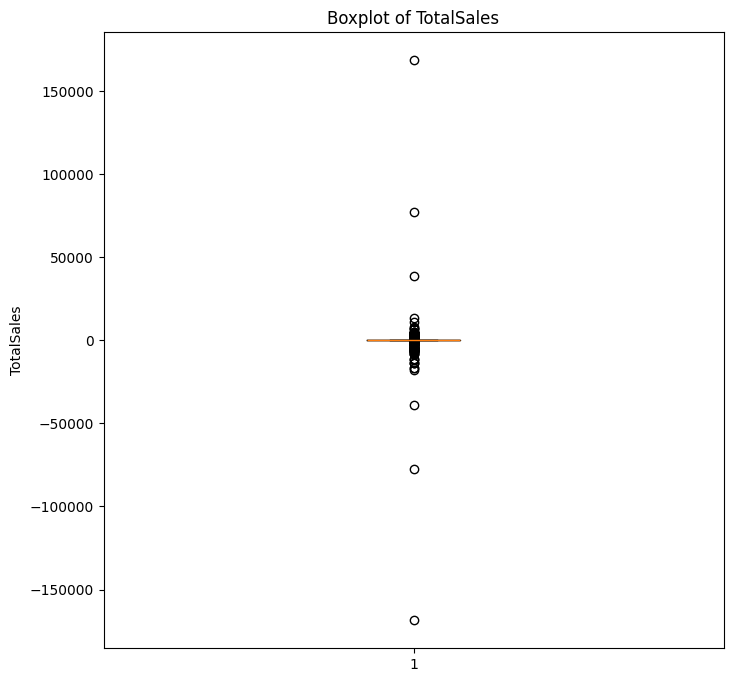

In [34]:
#Plot a box plot for Total Sales
plt.figure(figsize=(8,8))
plt.boxplot(df['TotalSales'])
plt.title('Boxplot of TotalSales')
plt.ylabel('TotalSales')
plt.show()

In [35]:
df['TotalSales'].describe()

count    541909.000000
mean         17.987795
std         378.810824
min     -168469.600000
25%           3.400000
50%           9.750000
75%          17.400000
max      168469.600000
Name: TotalSales, dtype: float64

Null Data Detection

In [36]:
#Calculate the total number of null data in each features in df
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
TotalSales          0
Year                0
Month               0
Day                 0
DayOfWeek           0
YearMonth           0
Canceled            0
Manual              0
Discount            0
dtype: int64

Visualization for missing values

In [37]:
#Calculate the total cells in df
total_cells = np.prod(df.shape)
#Calculate the total number (in cells) of missing values
total_missing_values = df.isnull().sum().sum()

#Calculate the percentage of missing value and non-missing values
percentage_missing_values = (total_missing_values / total_cells) * 100
percentage_non_missing_values = 100 - percentage_missing_values

In [38]:
#Print the percentage of missing values in the data set
print("Percentage of Missing Values: {:.2f}%.".format(percentage_missing_values))

Percentage of Missing Values: 1.48%.


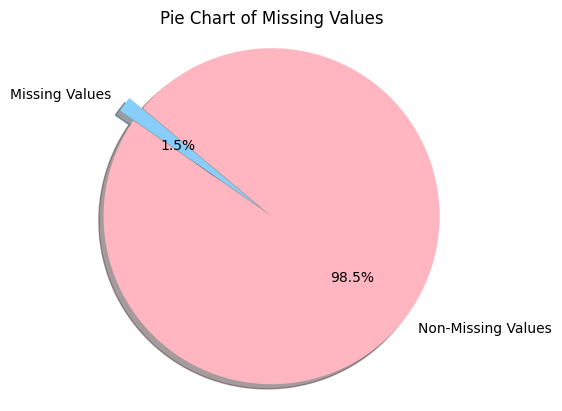

In [39]:
#Plot a pie chart to visualize the distribution of missing value and non-missing value
labels = ['Missing Values', 'Non-Missing Values']
sizes = [total_missing_values, total_cells - total_missing_values]
colors = ['lightskyblue', 'lightpink']
explode = (0.1, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Pie Chart of Missing Values')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
 8   TotalSales   541909 non-null  float64       
 9   Year         541909 non-null  int32         
 10  Month        541909 non-null  int32         
 11  Day          541909 non-null  int32         
 12  DayOfWeek    541909 non-null  object        
 13  YearMonth    541909 non-null  object        
 14  Canceled     541909 non-null  bool          
 15  Manual       541909 non-null  bool

Duplicate Data Detection

In [41]:
#Calculate the total number of duplicate rows in data set
duplicate_rows = df[df.duplicated()]
print('Number of duplicate rows: ', duplicate_rows.shape)

Number of duplicate rows:  (5268, 17)


Outlier Detection

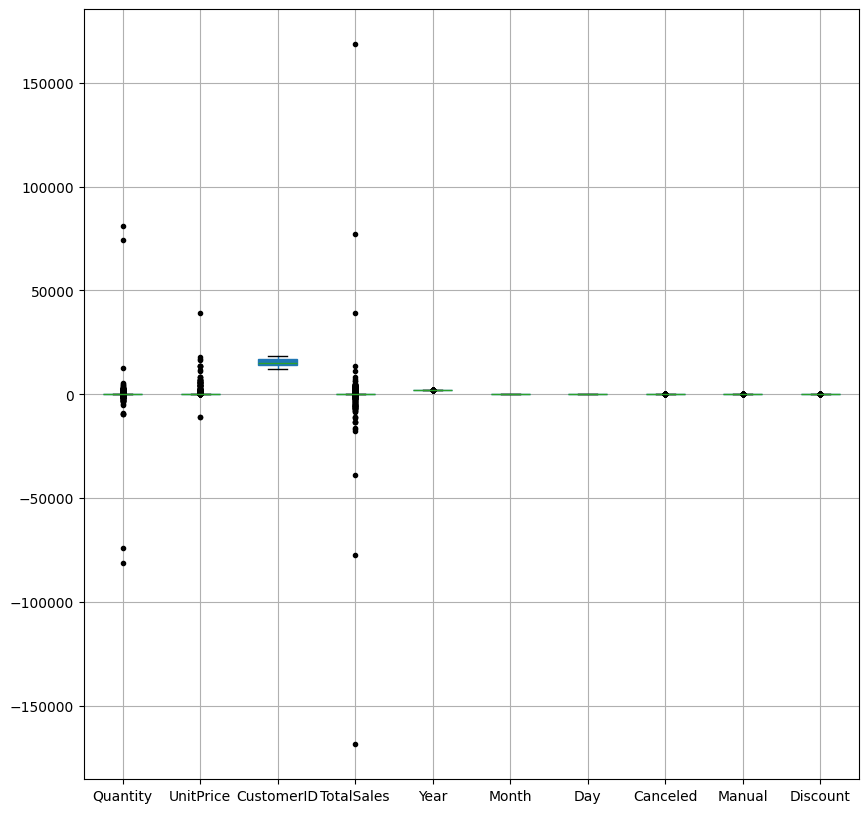

In [42]:
#Plot the box plot for the features in df
plt.figure(figsize=(10,10))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

Zero Values Detection

In [43]:
#Calculate the zero values in'Quantity' and 'UnitPrice'
zero_Quantity = (df['Quantity'] == 0).sum()
zero_UnitPrice = (df['UnitPrice'] == 0).sum()

#Print the information found for the zero values detection
print("Total Number of Zero Values: ")
print("===============================")
print("Quantity: ", zero_Quantity)
print("Unit Price: ", zero_UnitPrice)

Total Number of Zero Values: 
Quantity:  0
Unit Price:  2515


Mutual Information Approach

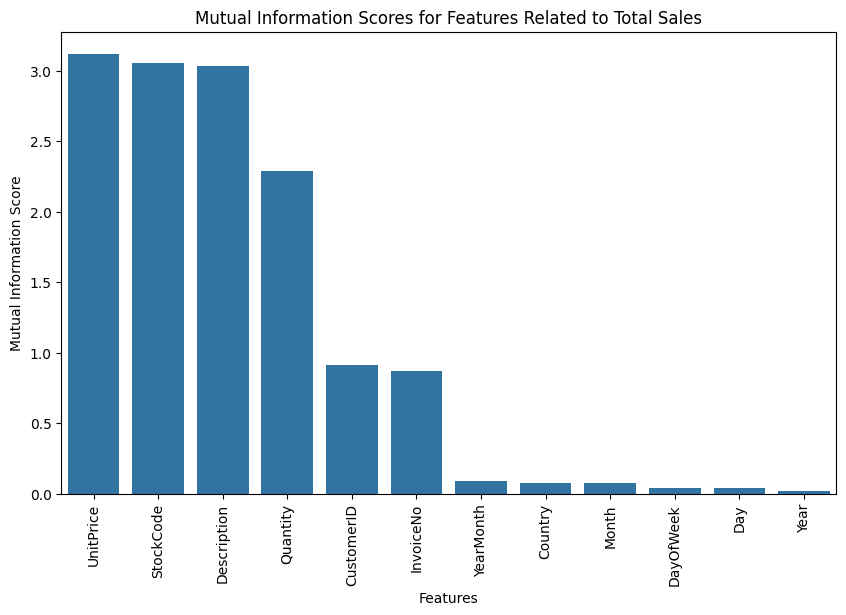

In [44]:
from sklearn.feature_selection import mutual_info_regression

#Determine the x-value and y-value
x = corr_df.drop(['InvoiceDate', 'TotalSales'], axis=1)
y = corr_df['TotalSales']

#Calculate the mutual information regression for x and y
mi = mutual_info_regression(x,y)
#Create a new data frame to store the mutual information for each of the features in df
mi_scores = pd.DataFrame(mi, index=x.columns, columns=['Mutual Information Score'])

#Sort the mutual information in descending order
mi_scores = mi_scores.sort_values(by='Mutual Information Score', ascending=False)

#Plot a graph to visualize the mutual information scores for features related to total sales
plt.figure(figsize=(10,6))
sns.barplot(x=mi_scores.index, y=mi_scores['Mutual Information Score'])
plt.title('Mutual Information Scores for Features Related to Total Sales')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()

Data Selection

In [45]:
#Drop the unecessary columns in df
df = df.drop(columns=['InvoiceDate', 'Canceled', 'Manual', 'Discount'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   UnitPrice    541909 non-null  float64
 5   CustomerID   406829 non-null  float64
 6   Country      541909 non-null  object 
 7   TotalSales   541909 non-null  float64
 8   Year         541909 non-null  int32  
 9   Month        541909 non-null  int32  
 10  Day          541909 non-null  int32  
 11  DayOfWeek    541909 non-null  object 
 12  YearMonth    541909 non-null  object 
dtypes: float64(3), int32(3), int64(1), object(6)
memory usage: 47.5+ MB


Data Cleaning

In [47]:
#Drop the duplicate rows in df
df.drop_duplicates(inplace = True)

In [48]:
#Drop the null values in CustomerID
df.dropna(subset = ['CustomerID'], inplace = True)

In [49]:
#Drop the manual input 
df = df[df['StockCode'] != "M"]

In [50]:
#Drop the rows that contain null value
df = df.dropna()

#Drop the rows that quantity is smaller than 0
df = df[df['Quantity'] > 0]
#Rearrange the data set by reset the index
df.reset_index(drop = True, inplace = True)

#Drop the rows that unitPrice is smaller than 0
df = df[df['UnitPrice'] > 0]
#Rearrange the data set by reset the index
df.reset_index(drop = True, inplace = True)

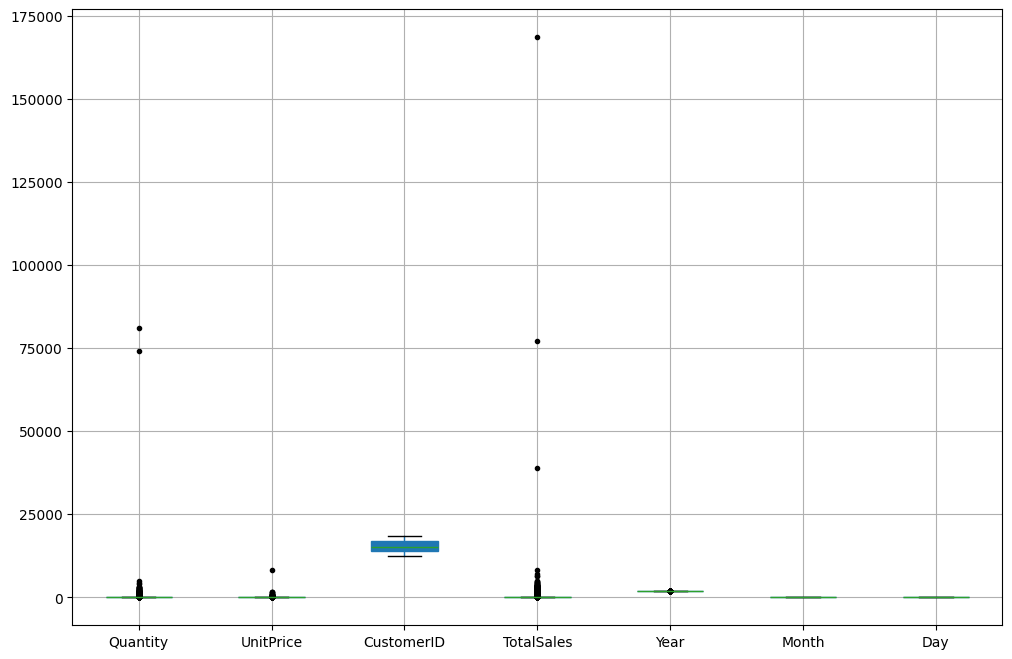

In [51]:
#Plot a box plot to visualize the outlier of the data set
plt.figure(figsize=(12,8))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

In [52]:
from scipy import stats

#Calculate the Z-score for 'Quantity', 'UnitPrice' and 'TotalSales'
z_Score = np.abs(stats.zscore(df[['Quantity', 'UnitPrice', 'TotalSales']]))
print(z_Score)

        Quantity  UnitPrice  TotalSales
0       0.039394   0.029995    0.023205
1       0.039394   0.025835    0.006987
2       0.028315   0.016702    0.001646
3       0.039394   0.025835    0.006987
4       0.039394   0.025835    0.006987
...          ...        ...         ...
392407  0.006157   0.142983    0.039615
392408  0.039394   0.059903    0.031892
392409  0.050474   0.076347    0.019022
392410  0.050474   0.076347    0.019022
392411  0.056013   0.129518    0.024653

[392412 rows x 3 columns]


In [53]:
#Define the threshold
threshold = 3

#Print the indices for outliers
outlier_indices = np.where(z_Score > threshold)
print(outlier_indices)

(array([   237,    703,    838, ..., 391616, 391946, 391946]), array([1, 0, 2, ..., 0, 0, 2]))


In [54]:
#Remove the outliers
df = df[(z_Score < threshold).all(axis=1)]

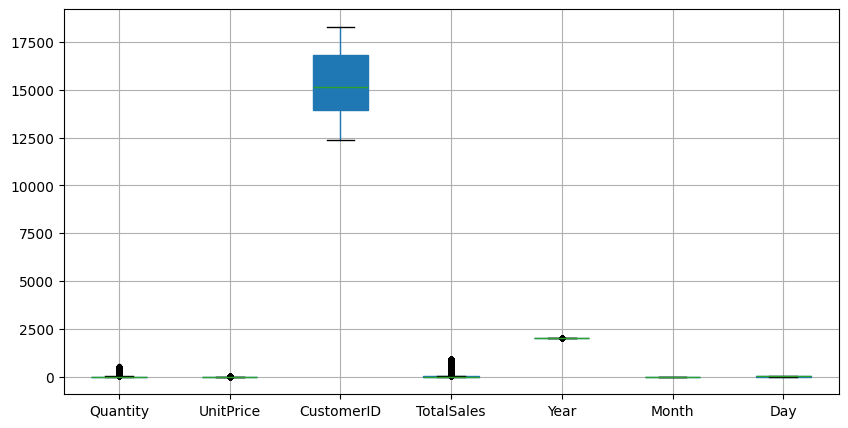

In [55]:
#Plot the box plot
plt.figure(figsize=(10,5))
df.boxplot(patch_artist=True, sym='k.')
plt.show()

In [56]:
#Check the total number of rows and columns in data set
df.shape

(391492, 13)

Data Construction

In [57]:
#Determine the numerical columns
numerical_Columns = ['Quantity', 'UnitPrice', 'Year']
numerical_Columns = df[numerical_Columns]

Data Normalization

In [58]:
print(np.min(numerical_Columns))
print(np.max(numerical_Columns))

#Calculate the normalized values for each of the numerical data
x_normalized = (numerical_Columns - numerical_Columns.min()) / (numerical_Columns.max() - numerical_Columns.min())

0.001
2011.0


In [59]:
print(x_normalized.head())

   Quantity  UnitPrice  Year
0  0.009276   0.056646   0.0
1  0.009276   0.075313   0.0
2  0.012987   0.061090   0.0
3  0.009276   0.075313   0.0
4  0.009276   0.075313   0.0


Data Concatenation

In [60]:
#Merge the normalized data with the original data set 
#by replacing it in the original data set
df['Quantity'] = x_normalized['Quantity']
df['UnitPrice'] = x_normalized['UnitPrice']

Data Selection for Modeling

In [61]:
#Determine y = TotalSales
#X = StockCode, Description, Quantity, UnitPrice, CustomerID, Country, Year, Month

y = df.TotalSales.values
x_Data = df.drop(['InvoiceNo', 'Day', 'YearMonth', 'TotalSales'], axis=1)

In [62]:
from sklearn.preprocessing import LabelEncoder

#Encodes all the categorical data
le = LabelEncoder()
x_Data['StockCode'] = le.fit_transform(x_Data['StockCode'])
x_Data['Description'] = le.fit_transform(x_Data['Description'])
x_Data['CustomerID'] = le.fit_transform(x_Data['CustomerID'])
x_Data['Country'] = le.fit_transform(x_Data['Country'])
x_Data['DayOfWeek'] = le.fit_transform(x_Data['DayOfWeek'])

Train Test Split

In [63]:
#Import all the neccessary libraries that will be used for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_percentage_error, r2_score, mean_squared_error, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.inspection import permutation_importance
from sklearn.linear_model import Ridge
from sklearn.tree import plot_tree

In [64]:
#Train test split
x_train, x_test, y_train, y_test = train_test_split(x_Data, y, test_size=0.2, random_state=0)

Mean Absolute Percentage Error (MAPE)

In [65]:
#Find the mean absolute percentage error (MAPE)
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

#Create a model instance
model = LinearRegression()

#Train the model
model.fit(x_train, y_train)

#Prediction
y_pred = model.predict(x_test)

#MAPE Calculation
mape = mean_absolute_percentage_error(y_test, y_pred)
print('MAPE: {:.2f}%'.format(mape * 100))

MAPE: 71.24%


R2-Squared

In [66]:
from sklearn.metrics import r2_score

#R-Squared calculation
r_squared = r2_score(y_test, y_pred)
print('R-Squared: {:.6f}'.format(r_squared))

R-Squared: 0.537694


In [67]:
from sklearn.metrics import mean_squared_error

#RMSE calculation
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE: {:.6f}'.format(rmse))

RMSE: 27.773944


In [68]:
from sklearn.metrics import mean_absolute_error

#MAE calculation
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.6f}'.format(mae))

MAE: 9.829448


Model Building for Decision Tree Regressor

In [69]:
#Create a model instance
dt = DecisionTreeRegressor(random_state = 0)

#Train the model
dt.fit(x_train, y_train)

#Prediction
y_pred_dt = dt.predict(x_test)

#MAPE Calculation
mape_dt = mean_absolute_percentage_error(y_test, y_pred_dt)
print('MAPE: {:.2f}%'.format(mape_dt * 100))

MAPE: 0.03%


Hyperparameter Tuning for Decision Tree

In [70]:
#Determine the parameters for hyperparameter tuning
parameter_grid = {
    'max_features': ['sqrt'],
    'max_depth': [5],
    'criterion': ['squared_error'],
    'min_samples_leaf': [2],
    'min_samples_split': [3]
}

#Use grid search to fit the data
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

#Determine the best estimator by using grid search
best_model = grid_search.best_estimator_
y_pred_dt = best_model.predict(x_test)

#Calculate the accuracy for test set and training set
dt_accurate_test = (best_model.score(x_test, y_test)) * 100
dt_accurate_train = (best_model.score(x_train, y_train)) * 100

#Print the accuracy for test set and training set
print('Decision Tree accuracy for test set: {:.2f}%'.format(dt_accurate_test))
print('Decision Tree accuracy for training set: {:.2f}%'.format(dt_accurate_train))


Decision Tree accuracy for test set: 82.77%
Decision Tree accuracy for training set: 83.12%


Brief Evaluation for Decision Tree

In [71]:
# Calculate MAPE
dt_mape = mean_absolute_percentage_error(y_test, y_pred_dt)
print('MAPE for Decision Tree Regressor: {:.2f}%'.format(dt_mape * 100))

# Calculate R-Squared
dt_r2 = r2_score(y_test, y_pred_dt)
print('R-Squared for Decision Tree Regressor: {:.6f}'.format(dt_r2))

# Calculate RMSE
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print('RMSE for Decision Tree Regressor: {:.6f}'.format(dt_rmse))

# Calculate MAE
dt_mae = mean_absolute_error(y_test, y_pred_dt)
print('MAE for Decision Tree Regressor: {:.6f}'.format(dt_mae))

MAPE for Decision Tree Regressor: 67.25%
R-Squared for Decision Tree Regressor: 0.827693
RMSE for Decision Tree Regressor: 16.956007
MAE for Decision Tree Regressor: 7.275265


Visualization for Decision Tree

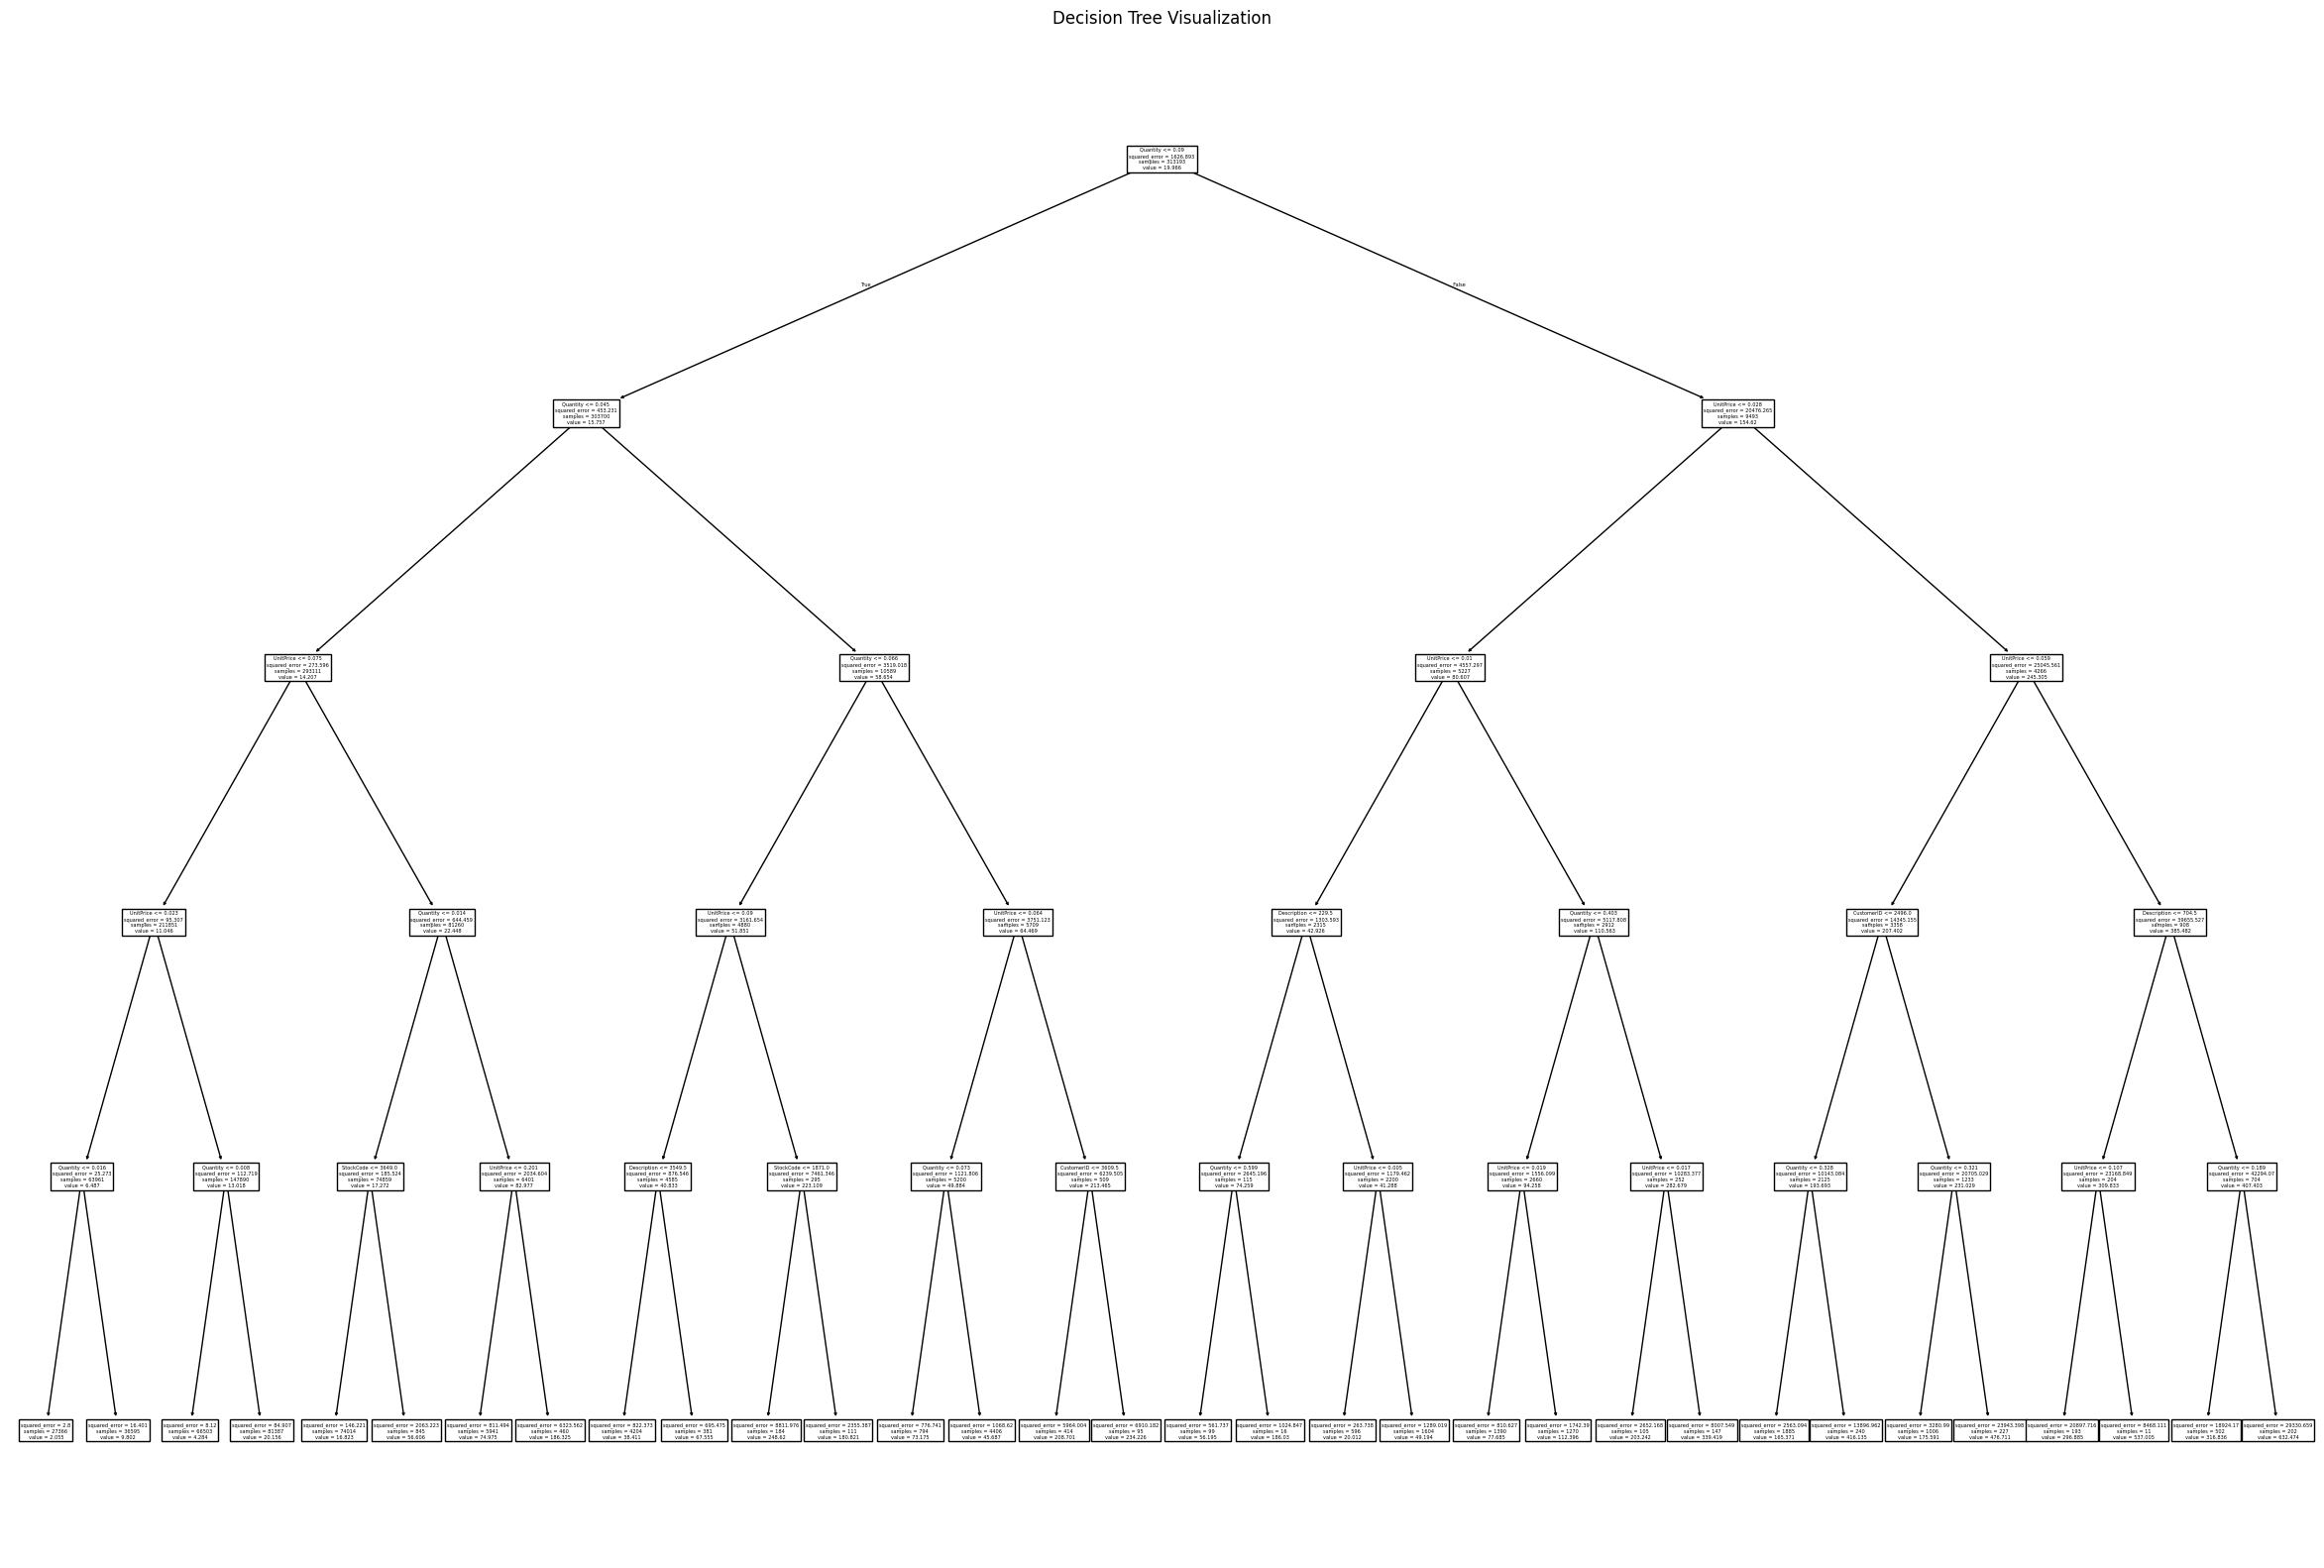

In [72]:
#Plot the decision tree
plt.figure(figsize=(30,20))
plot_tree(best_model, feature_names=x_train.columns)
plt.title('Decision Tree Visualization')
plt.show()

Scatter Plot for Decision Tree

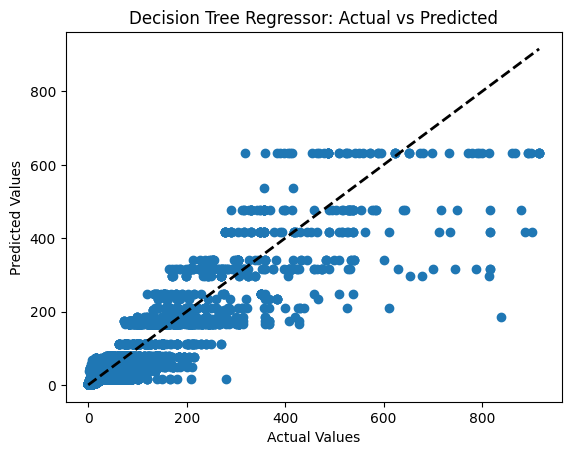

In [73]:
#Scatter plot of Actual and predicted values by using Decision Tree Regressor
plt.scatter(y_test, y_pred_dt)
#Plot the diagonal line (perfect prediction)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree Regressor: Actual vs Predicted')
plt.show()

Residual Plot for Decision Tree

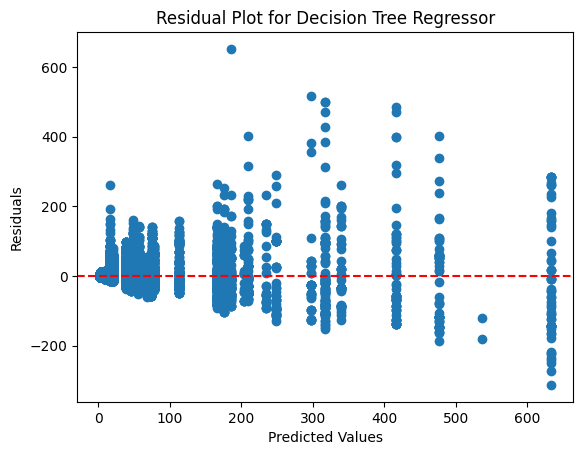

In [74]:
#Calculate the residuals
residuals = y_test - y_pred_dt

#Plot a residual plot for decision tree regressor
plt.scatter(y_pred_dt, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Decision Tree Regressor')
plt.show()

Feature Importance for Decision Tree

Feature ranking for Decision Tree Regressor:
1. feature 2 Quantity (0.678082)
2. feature 3 UnitPrice (0.310820)
3. feature 1 Description (0.004537)
4. feature 0 StockCode (0.003874)
5. feature 4 CustomerID (0.002687)
6. feature 8 DayOfWeek (0.000000)
7. feature 5 Country (0.000000)
8. feature 7 Month (0.000000)
9. feature 6 Year (0.000000)


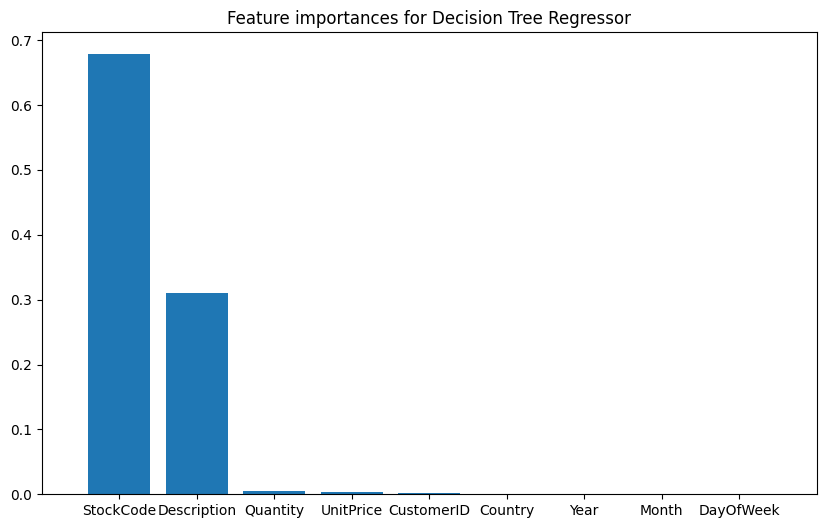

In [75]:
#find the importance for each of the feature
importance= best_model.feature_importances_

#Sort the importance in descending order
indices = np.argsort(importance)[::-1]
#Determine the feature name
feature_name = x_Data.columns

#Print the feature ranking
print("Feature ranking for Decision Tree Regressor:")
for f in range(x_Data.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name[indices[f]], importance[indices[f]]))

#Plot the bar chart for the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances for Decision Tree Regressor")
plt.bar(range(x_Data.shape[1]), importance[indices], align="center")
plt.xticks(range(x_Data.shape[1]), feature_name)
plt.xlim([-1, x_Data.shape[1]])
plt.show()

Model Building for Linear Support Vector Regression (SVR)

In [76]:
#Create a model instance
svr = LinearSVR()
svr.fit(x_train, y_train)

#Prediction
y_pred_svr = svr.predict(x_test)

#MAPE Calculation
mape_svr = mean_absolute_percentage_error(y_test, y_pred_svr)
print('MAPE for Linear Support Vector Regression: {:.2f}%'.format(mape_svr * 100))

MAPE for Linear Support Vector Regression: 468.97%


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Hyperparameter Tuning for Linear SVR

In [77]:
#Determine the parameter used
parameter_grid = {
    'C': [None, 0.1, 1, 10],
    'epsilon': [None, 0.1, 0.2],
    'loss': ['epsilon_insensitive', 'squared_epsilon_insensitive']
}

#Use grid search to fit the data
svr_grid = GridSearchCV(LinearSVR(random_state=0), parameter_grid, cv=5)
svr_grid.fit(x_train, y_train)

#Determine the best estimator for the SVR
best_model = svr_grid.best_estimator_
y_pred_svr = best_model.predict(x_test)

#Calculation off accuracy for test set and training set
svr_accurate_test = best_model.score(x_test, y_test) * 100
svr_accurate_train = best_model.score(x_train, y_train) * 100

print('Linear Support Vector Regression accuracy for test set: {:.2f}%'.format(svr_accurate_train))
print('Linear Support Vector Regression accuracy for training set: {:.2f}%'.format(svr_accurate_test))

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.w

Linear Support Vector Regression accuracy for test set: 1.50%
Linear Support Vector Regression accuracy for training set: 1.61%


Basic Evaluation for LinearSVR

In [78]:
svr_mape = mean_absolute_percentage_error(y_test, y_pred_svr)
print('MAPE for Linear Support Vector Regression: {:.2f}%'.format(svr_mape * 100))

svr_r2 = r2_score(y_test, y_pred_svr)
print('R-Squared for Linear Support Vector Regression: {:.6f}'.format(svr_r2))

svr_rmse = np.sqrt(mean_squared_error(y_test ,y_pred_svr))
print('RMSE for Linear Support Vector Regression: {:.6f}'.format(svr_rmse))

svr_mae = mean_absolute_error(y_test, y_pred_svr)
print('MAE for Linear Support Vector Regression: {:.6f}'.format(svr_mae))

MAPE for Linear Support Vector Regression: 365.58%
R-Squared for Linear Support Vector Regression: 0.016051
RMSE for Linear Support Vector Regression: 40.519030
MAE for Linear Support Vector Regression: 16.713639


Scatter Plot for LinearSVR

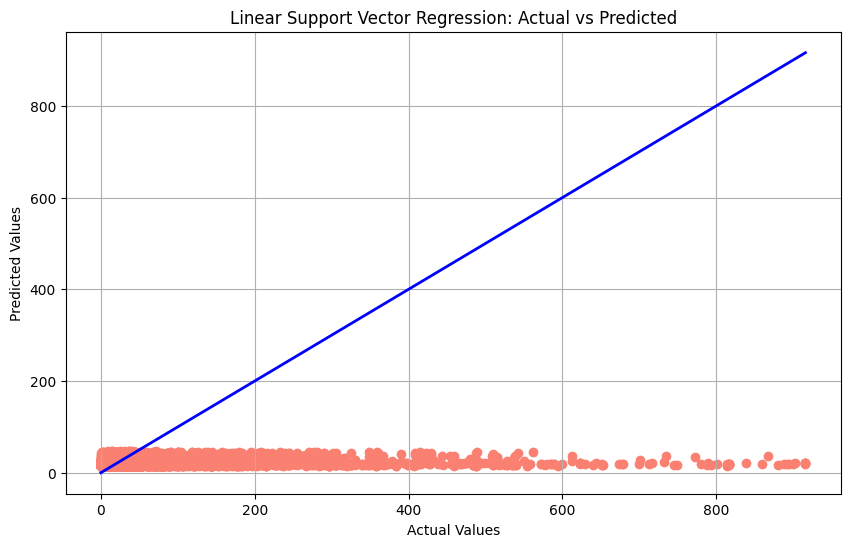

In [79]:
#Scatter plot of the actual and predicted value by using LinearSVR
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_svr, color='salmon')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', lw=2)
plt.title('Linear Support Vector Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

Residual Plot for LinearSVR

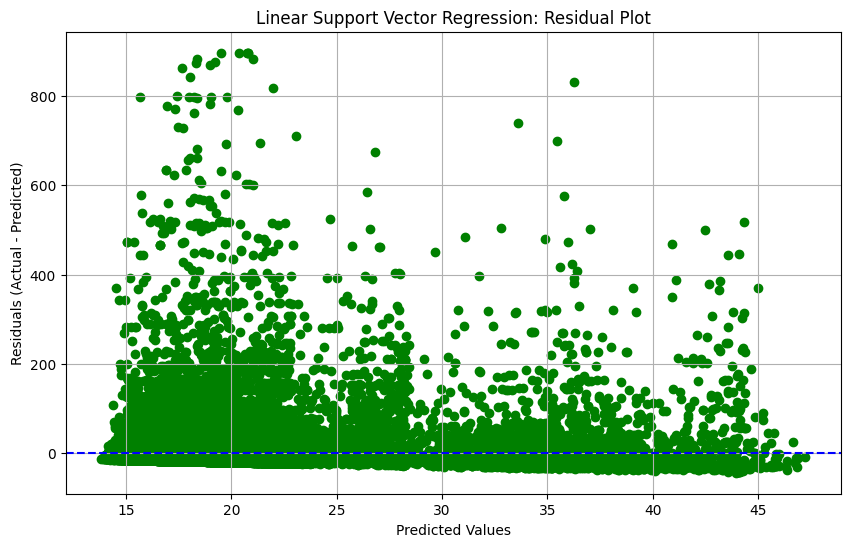

In [80]:
#Calculate the residuals
residuals = y_test - y_pred_svr

#Plot the residual plot for the LinearSVR
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_svr, residuals, color='green')
plt.axhline(y=0, color='blue', linestyle='--')
plt.title('Linear Support Vector Regression: Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

Feature Importance for LinearSVR

Feature ranking for LinearSVR:
1. feature 5 Country (-0.673093)
2. feature 7 Month (-0.138405)
3. feature 8 DayOfWeek (0.084235)
4. feature 2 Quantity (0.069757)
5. feature 3 UnitPrice (0.020147)
6. feature 6 Year (0.020032)
7. feature 0 StockCode (0.002201)
8. feature 4 CustomerID (-0.000284)
9. feature 1 Description (-0.000054)


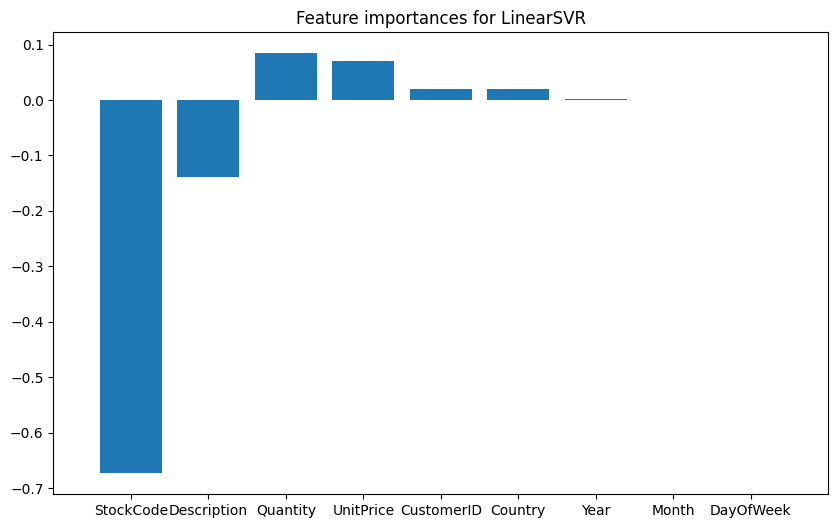

In [81]:
#Calculate the importance of the features by using coefficient
importance= best_model.coef_

#Sort the importance in descending order
indices = np.argsort(np.abs(importance))[::-1]
#Determine the feature name
feature_name = x_Data.columns

#Print the feature ranking
print("Feature ranking for LinearSVR:")
for f in range(x_Data.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name[indices[f]], importance[indices[f]]))

#Plot the bar chart for the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances for LinearSVR")
plt.bar(range(x_Data.shape[1]), importance[indices], align="center")
plt.xticks(range(x_Data.shape[1]), feature_name)
plt.xlim([-1, x_Data.shape[1]])
plt.show()

Model Building for Random Forest

In [82]:
#Create a model instance
rf = RandomForestRegressor(random_state = 0)

#Train the model
rf.fit(x_train, y_train)

#Prediction
y_pred_rf = rf.predict(x_test)

#MAPE Calculation
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)
print('MAPE: {:.2f}%'.format(mape_rf * 100))

MAPE: 0.08%


Hyperparameter Tuning of Random Forest

In [83]:
#Determine the parameter used
parameter_grid = {
    'n_estimators': [50, 100, 300],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'max_features': [None, 10]
}

#Use grid search to fit the data
grid_search = GridSearchCV(RandomForestRegressor(random_state=0), parameter_grid, cv=5, n_jobs=-1)
grid_search.fit(x_train, y_train)

#Determine the best estimator
best_model = grid_search.best_estimator_
y_pred_rf = best_model.predict(x_test)

#Calculate the accuracy for test set and training set
rf_accurate_test = (best_model.score(x_test, y_test)) * 100
rf_accurate_train = (best_model.score(x_train, y_train)) * 100

print('Random Forest accuracy for test set: {:.2f}%'.format(rf_accurate_test))
print('Random Forest accuracy for training set: {:.2f}%'.format(rf_accurate_train))

Random Forest accuracy for test set: 99.87%
Random Forest accuracy for training set: 99.98%


Basic Evaluation for Random Forest

In [84]:
# Calculate MAPE
rf_mape = mean_absolute_percentage_error(y_test, y_pred_rf)
print('MAPE for Random Forest: {:.2f}%'.format(rf_mape * 100))

# Calculate R-Squared
rf_r2 = r2_score(y_test, y_pred_rf)
print('R-Squared for Random Forest: {:.6f}'.format(rf_r2))

# Calculate RMSE
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print('RMSE for Random Forest: {:.6f}'.format(rf_rmse))

# Calculate MAE
rf_mae = mean_absolute_error(y_test, y_pred_rf)
print('MAE for Random Forest: {:.6f}'.format(rf_mae))


MAPE for Random Forest: 0.08%
R-Squared for Random Forest: 0.998741
RMSE for Random Forest: 1.449645
MAE for Random Forest: 0.057673


Scatter Plot for Random Forest

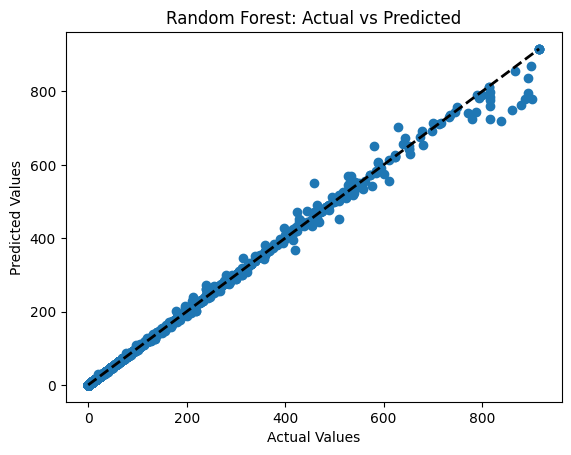

In [85]:
#Scatter plot for random forest

plt.scatter(y_test, y_pred_rf)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs Predicted')
plt.show()

Residual Plot for Random Forest

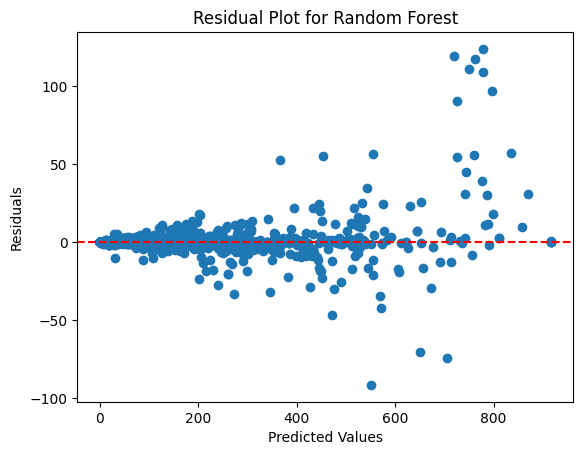

In [86]:
#Calculate the residuals
residuals = y_test - y_pred_rf

#Plot the residual plot for random forest
plt.scatter(y_pred_rf, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Random Forest')
plt.show()

Feature Importance for Random Forest

Feature ranking for Random Forest:
1. feature 2 Quantity (0.612524)
2. feature 3 UnitPrice (0.385796)
3. feature 1 Description (0.000533)
4. feature 0 StockCode (0.000420)
5. feature 4 CustomerID (0.000293)
6. feature 7 Month (0.000206)
7. feature 8 DayOfWeek (0.000145)
8. feature 5 Country (0.000067)
9. feature 6 Year (0.000016)


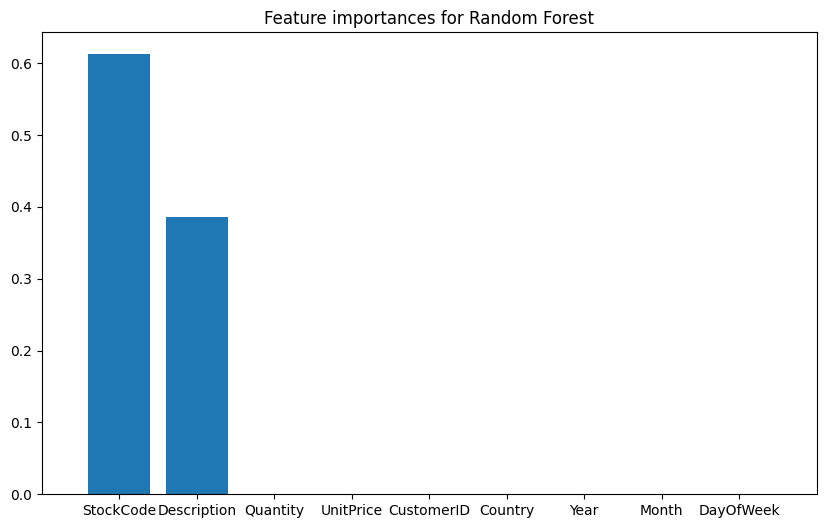

In [87]:
#Calculate the importance for each of the feature
importance= best_model.feature_importances_

#Sort the feature in descending order
indices = np.argsort(importance)[::-1]
#Determine the feature name
feature_name = x_Data.columns

#Print the feature ranking
print("Feature ranking for Random Forest:")
for f in range(x_Data.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name[indices[f]], importance[indices[f]]))

#Plot the bar chart for the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature importances for Random Forest")
plt.bar(range(x_Data.shape[1]), importance[indices], align="center")
plt.xticks(range(x_Data.shape[1]), feature_name)
plt.xlim([-1, x_Data.shape[1]])
plt.show()

Model Building for KNN

In [88]:
#Create a model instance
knn = KNeighborsRegressor()
knn.fit(x_train, y_train)

#Prediction
y_pred_knn = knn.predict(x_test)

#MAPE Calculation
mape_knn = mean_absolute_percentage_error(y_test, y_pred_knn)
print('MAPE for K-Neighbors Regressor: {:.2f}%'.format(mape_knn * 100))

MAPE for K-Neighbors Regressor: 201.66%


Hyperparameter Tuning for KNN

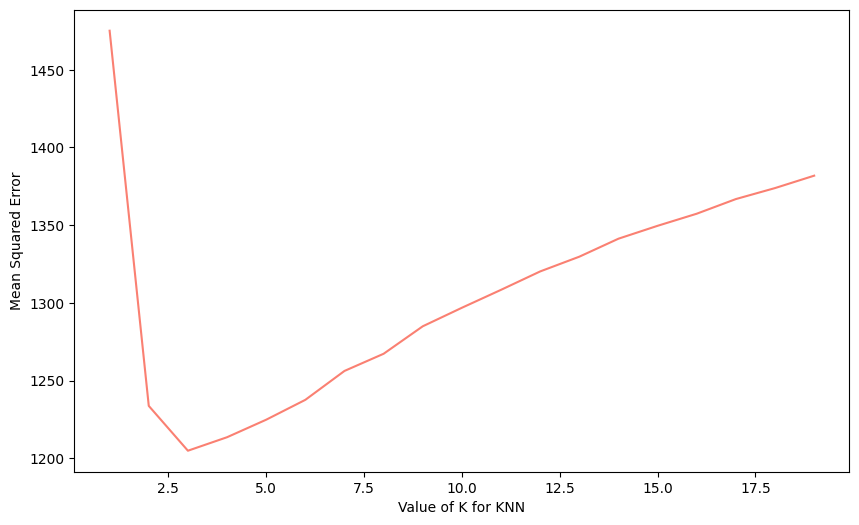

The best value for k is: 3


In [89]:
mse = []

#to determine k-value
for k in range(1, 20):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    mse.append(mean_squared_error(y_test, y_pred_knn))

#Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 20), mse, color='salmon')
plt.xlabel('Value of K for KNN')
plt.ylabel('Mean Squared Error')
plt.show()

#Print the  optimal k-value
best_k = np.argmin(mse) + 1 
print(f'The best value for k is: {best_k}')

In [90]:
#Fit the data with the optimal k-value found
knn = KNeighborsRegressor(n_neighbors=best_k)
knn.fit(x_train, y_train)

#Calculate the accuracy for test set and training set
knn_accurate_test = (knn.score(x_test, y_test)) * 100
knn_accurate_train = (knn.score(x_train, y_train)) * 100

print('KNN accuracy for test set: {:.2f}%'.format(knn_accurate_train))
print('KNN accuracy for training set: {:.2f}%'.format(knn_accurate_test))

KNN accuracy for test set: 67.43%
KNN accuracy for training set: 27.79%


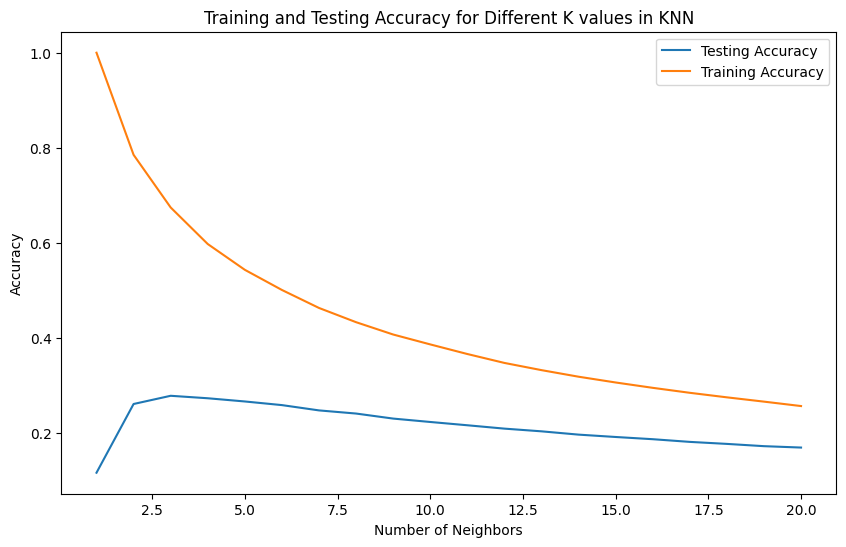

In [91]:
#Visualize the training and testing accuracy for different K-values
neighbors = list(range(1, 21))
knn_train_accuracy = np.empty(len(neighbors))
knn_test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    knn_train_accuracy[i] = knn.score(x_train, y_train)
    knn_test_accuracy[i] = knn.score(x_test, y_test)

#Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(neighbors, knn_test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, knn_train_accuracy, label='Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different K values in KNN')
plt.show()

Scatter Plot for KNN

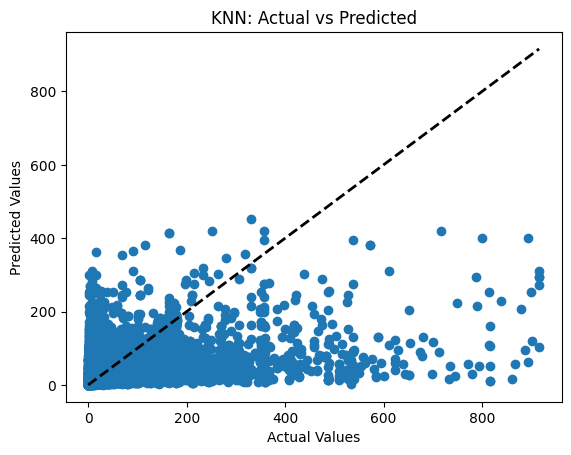

In [92]:
#Scatter plot of actual and predicted values for KNN
plt.scatter(y_test, y_pred_knn)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2) 
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('KNN: Actual vs Predicted')
plt.show()

Residual Plot for KNN

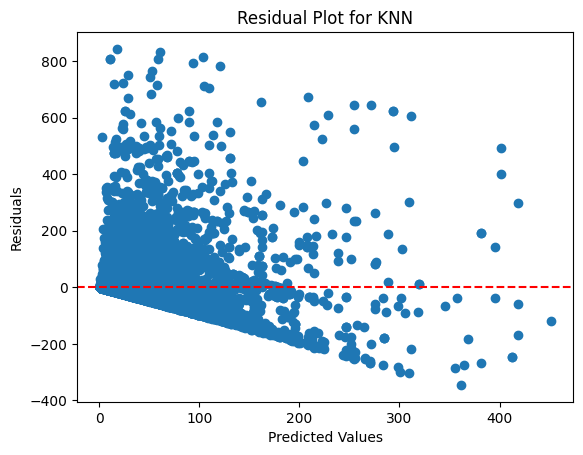

In [93]:
#Calculate the residuals
residuals = y_test - y_pred_knn

# Plot the residuals plot for KNN
plt.scatter(y_pred_knn, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for KNN')
plt.show()

Basic Evaluation for KNN

In [94]:
knn_mape = mean_absolute_percentage_error(y_test, y_pred_knn)
print('MAPE for K-Neighbors Regressor: {:.2f}%'.format(knn_mape * 100))
knn_r2 = r2_score(y_test, y_pred_knn)
print('R-Squared for K-Neighbors Regressor: {:.6f}'.format(knn_r2))
knn_rmse = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print('RMSE for K-Neighbors Regressor: {:.6f}'.format(knn_rmse))
knn_mae = mean_absolute_error(y_test, y_pred_knn)
print('MAE for K-Neighbors Regressor: {:6f}'.format(knn_mae))

MAPE for K-Neighbors Regressor: 251.79%
R-Squared for K-Neighbors Regressor: 0.171834
RMSE for K-Neighbors Regressor: 37.173320
MAE for K-Neighbors Regressor: 15.254806


Feature Importance for KNN

Permutation Feature Importance for KNN:
Feature 4 (CustomerID): 0.28935928954928325
Feature 1 (Description): 0.25276604867258057
Feature 0 (StockCode): 0.24481368585679783
Feature 5 (Country): 0.004674589578697708
Feature 2 (Quantity): 0.0004572552441316047
Feature 7 (Month): 0.0003427539614138775
Feature 3 (UnitPrice): 3.933495267359755e-05
Feature 8 (DayOfWeek): 2.8369246284021266e-05
Feature 6 (Year): -7.645109599108135e-06


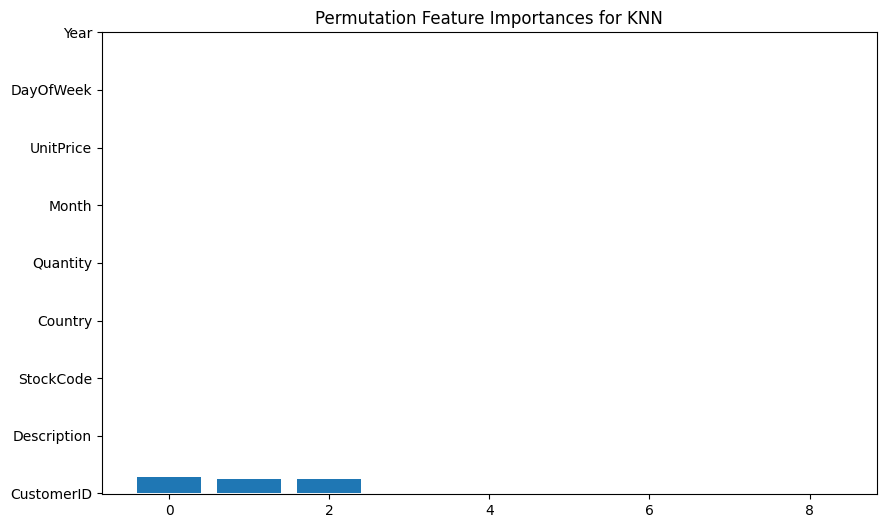

In [95]:
#Calculate
perm_importance = permutation_importance(knn, x_test, y_test, n_repeats=10, random_state=0)

#Get the sorted indices of feature importances
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

#Print the permutation importance ranking
print("Permutation Feature Importance for KNN:")
for i in sorted_indices:
    print(f"Feature {i} ({x_Data.columns[i]}): {perm_importance.importances_mean[i]}")

#Plot the importance
plt.figure(figsize=(10, 6))
plt.title("Permutation Feature Importances for KNN")
plt.bar(range(x_Data.shape[1]), perm_importance.importances_mean[sorted_indices], align="center")
plt.yticks(range(x_Data.shape[1]), x_Data.columns[sorted_indices])
plt.show()

Model Building for Ridge Regression

In [96]:
# Create a Ridge model instance
ridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter for regularization strength
ridge.fit(x_train, y_train)

# Prediction
y_pred_ridge = ridge.predict(x_test)

# MAPE Calculation
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
print('MAPE for Ridge Regression: {:.2f}%'.format(mape_ridge * 100))

MAPE for Ridge Regression: 71.14%


Hyperparameter Tuning for Ridge Regression

In [97]:
#Determine the parameter used
parameter_grid = {
    'alpha': [None, 0.1, 1, 10], 
    'solver': [None, 'auto', 'svd', 'cholesky', 'saga']
}

#Use grid search to fit the model
grid_search = GridSearchCV(Ridge(random_state=0), parameter_grid, cv=5)
grid_search.fit(x_train, y_train)

#Determine the best estimator
best_model = grid_search.best_estimator_
y_pred_rr = best_model.predict(x_test)


#Calculate the accuracy for test set and training set
rr_accurate_test = (best_model.score(x_test, y_test)) * 100
rr_accurate_train = (best_model.score(x_train, y_train)) * 100

print('Ridge Regression accuracy for test set: {:.2f}%'.format(rr_accurate_test))
print('Ridge Regression accuracy for training set: {:.2f}%'.format(rr_accurate_train))


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_

Ridge Regression accuracy for test set: 53.77%
Ridge Regression accuracy for training set: 52.64%


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs

Basic Evaluation for Ridge Regression

In [98]:
rr_mape = mean_absolute_percentage_error(y_test, y_pred_ridge)
print('MAPE for Ridge Regression: {:.2f}%'.format(rr_mape * 100))
rr_r2 = r2_score(y_test, y_pred_ridge)
print('R-Squared for Ridge Regression: {:6f}'.format(rr_r2))
rr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print('RMSE for Ridge Regression: {:6f}'.format(rr_rmse))
rr_mae = mean_absolute_error(y_test, y_pred_ridge)
print('MAE for Ridge Regression: {:.6f}'.format(rr_mae))

MAPE for Ridge Regression: 71.14%
R-Squared for Ridge Regression: 0.537671
RMSE for Ridge Regression: 27.774629
MAE for Ridge Regression: 9.830439


Scatter Plot for Ridge Regression

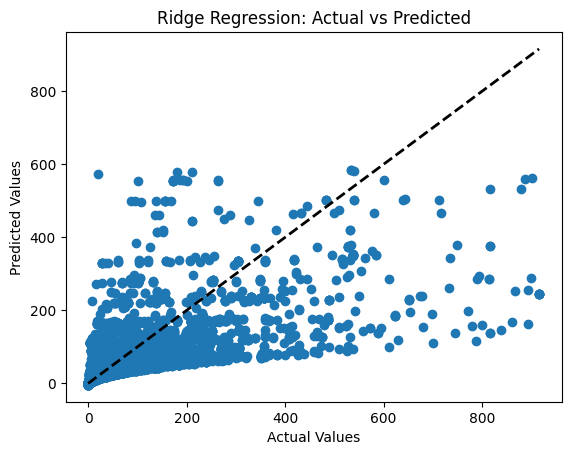

In [99]:
#Scatter plot of actual and predicted value for Ridge Regression
plt.scatter(y_test, y_pred_ridge)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Plot the diagonal line (perfect prediction)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression: Actual vs Predicted')
plt.show()

Residual Plot for Ridge Regression

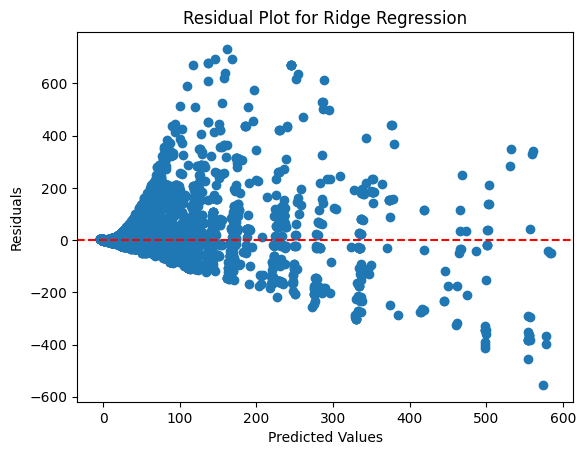

In [100]:
#Calculate the residuals
residuals = y_test - y_pred_ridge

#Plot the residual plot for Ridge Regression
plt.scatter(y_pred_ridge, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Ridge Regression')
plt.show()

Feature Importance for Ridge Regression

Feature ranking for Ridge Regression:
1. feature 2 Quantity (625.562686)
2. feature 3 UnitPrice (155.481035)
3. feature 6 Year (0.728188)
4. feature 5 Country (0.168336)
5. feature 8 DayOfWeek (0.091227)
6. feature 7 Month (0.023942)
7. feature 0 StockCode (0.001002)
8. feature 4 CustomerID (0.000109)
9. feature 1 Description (0.000050)


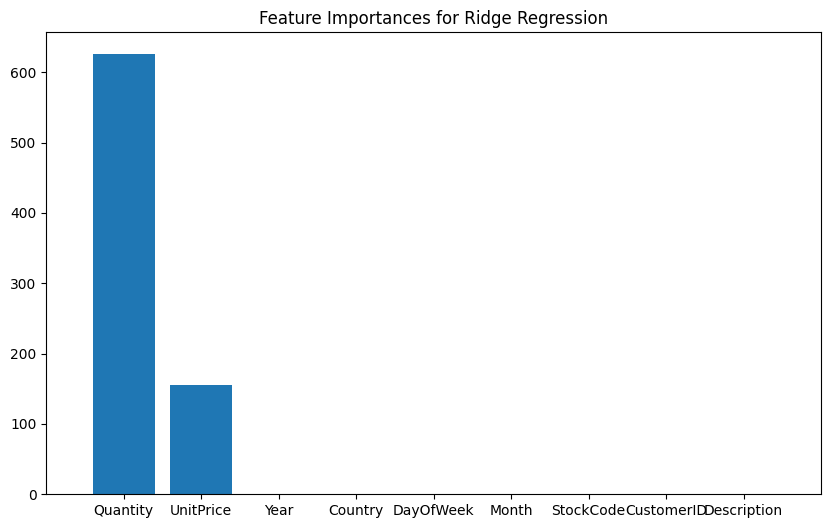

In [101]:
#Get the coefficients of the best model
coefficients = best_model.coef_

#Feature names
feature_name = x_Data.columns

#Calculate the importance based on absolute values of coefficients
importance = np.abs(coefficients)

#Sort features by importance
indices = np.argsort(importance)[::-1]

#Print the feature ranking
print("Feature ranking for Ridge Regression:")
for f in range(x_Data.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], feature_name[indices[f]], importance[indices[f]]))

#Plot the bar chart for the feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances for Ridge Regression")
plt.bar(range(x_Data.shape[1]), importance[indices], align="center")
plt.xticks(range(x_Data.shape[1]), [feature_name[i] for i in indices])
plt.xlim([-1, x_Data.shape[1]])
plt.show()

Evaluation

In [102]:
#Create arrays
model_Name = ['Decision Tree', 'LinearSVR', 'Random Forest', 'KNN', 'Ridge Regression']
model_Accuracy = [dt_accurate_test, svr_accurate_test, rf_accurate_test, knn_accurate_test, rr_accurate_test]
mape_of_All_Models = [dt_mape, svr_mape, rf_mape, knn_mape, rr_mape]
r2_of_All_Models = [dt_r2, svr_r2, rf_r2, knn_r2, rr_r2]
rmse_of_All_Models = [dt_rmse, svr_rmse, rf_rmse, knn_rmse, rr_rmse]
mae_of_All_Models = [dt_mae, svr_mae, rf_mae, knn_mae, rr_mae]

Create a DataFrame for Evaluation

In [103]:
#Create a DataFrame
results_df = pd.DataFrame({
    'Model Name': model_Name,
    'Accuracy (%)': model_Accuracy,
    'MAPE (%)': mape_of_All_Models,
    'R2 Score': r2_of_All_Models,
    'RMSE': rmse_of_All_Models,
    'MAE': mae_of_All_Models
})

#Display the DataFrame
print(results_df)

         Model Name  Accuracy (%)  MAPE (%)  R2 Score       RMSE        MAE
0     Decision Tree     82.769346  0.672539  0.827693  16.956007   7.275265
1         LinearSVR      1.605087  3.655809  0.016051  40.519030  16.713639
2     Random Forest     99.874056  0.000797  0.998741   1.449645   0.057673
3               KNN     27.788656  2.517935  0.171834  37.173320  15.254806
4  Ridge Regression     53.767105  0.711395  0.537671  27.774629   9.830439


Visualization for Accuracy

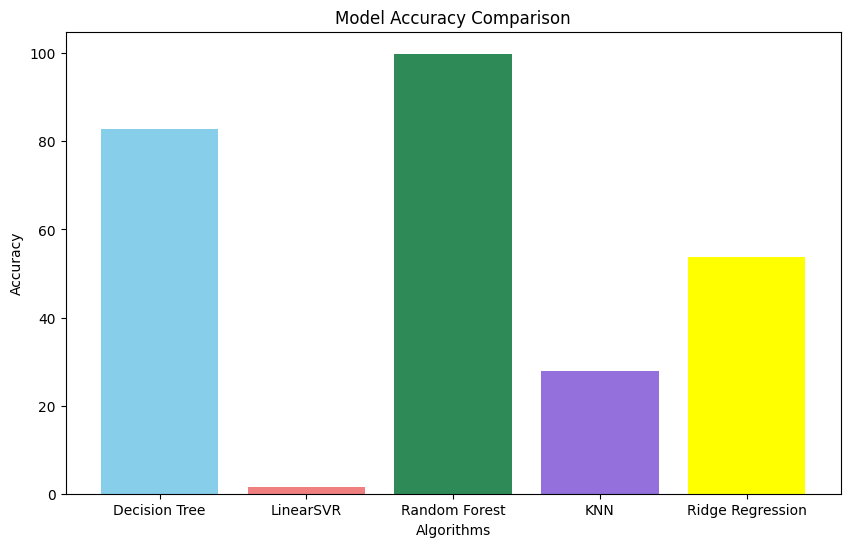

[82.7693461549124, 1.6050868912900418, 99.87405591159849, 27.788655511425187, 53.76710490153669]


In [104]:
#Visualization for Data Accuracy
plt.figure(figsize=(10, 6))
plt.bar(model_Name, model_Accuracy, color=['skyblue', 'lightcoral', 'seagreen', 'mediumpurple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

print(model_Accuracy)

Visualization for MAPE

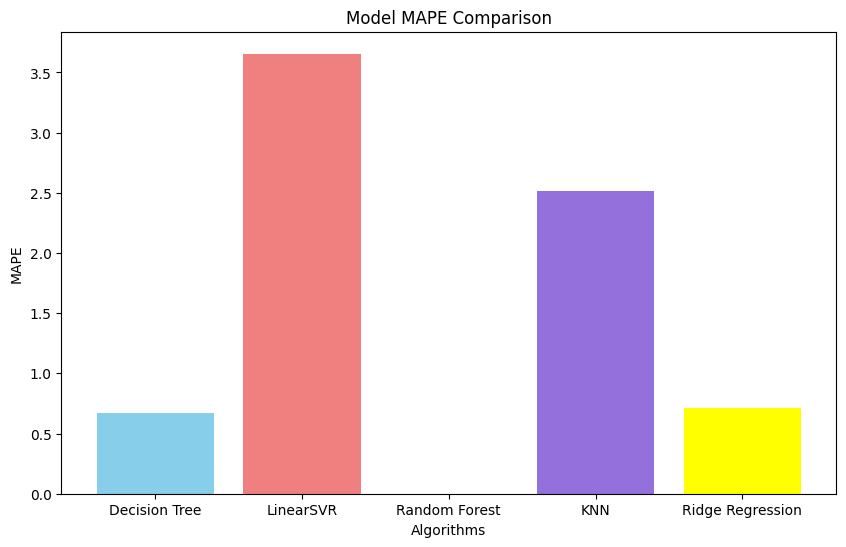

[np.float64(0.6725388147318718), np.float64(3.6558086927220415), np.float64(0.0007972261192464052), np.float64(2.5179348497215943), np.float64(0.7113950534565778)]


In [105]:
#Visualization for MAPE
plt.figure(figsize=(10, 6))
plt.bar(model_Name, mape_of_All_Models, color=['skyblue', 'lightcoral', 'seagreen', 'mediumpurple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('MAPE')
plt.title('Model MAPE Comparison')
plt.show()

print(mape_of_All_Models)

Visualization for R2

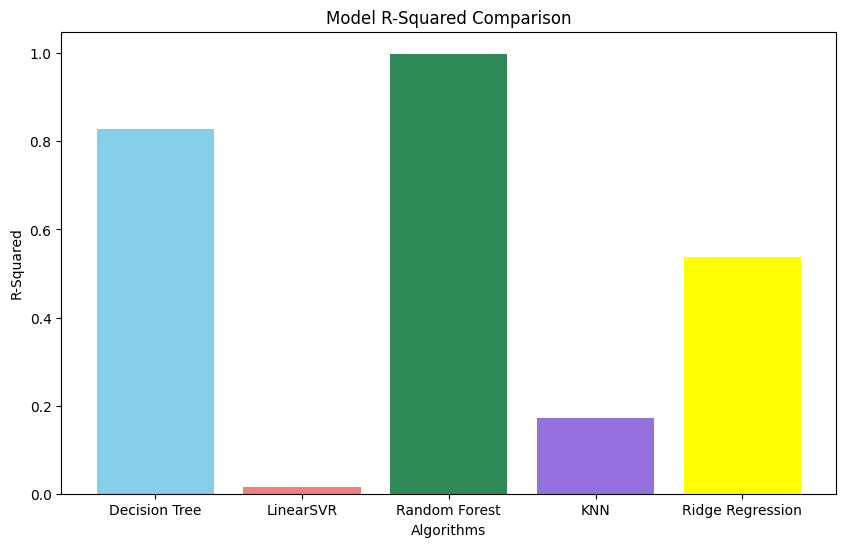

[0.8276934615491239, 0.016050868912900418, 0.9987405591159849, 0.1718342386446584, 0.5376710490153669]


In [106]:
#Visualization for R-Squared
plt.figure(figsize=(10, 6))
plt.bar(model_Name, r2_of_All_Models, color=['skyblue', 'lightcoral', 'seagreen', 'mediumpurple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('R-Squared')
plt.title('Model R-Squared Comparison')
plt.show()

print(r2_of_All_Models)

Visualization for RMSE

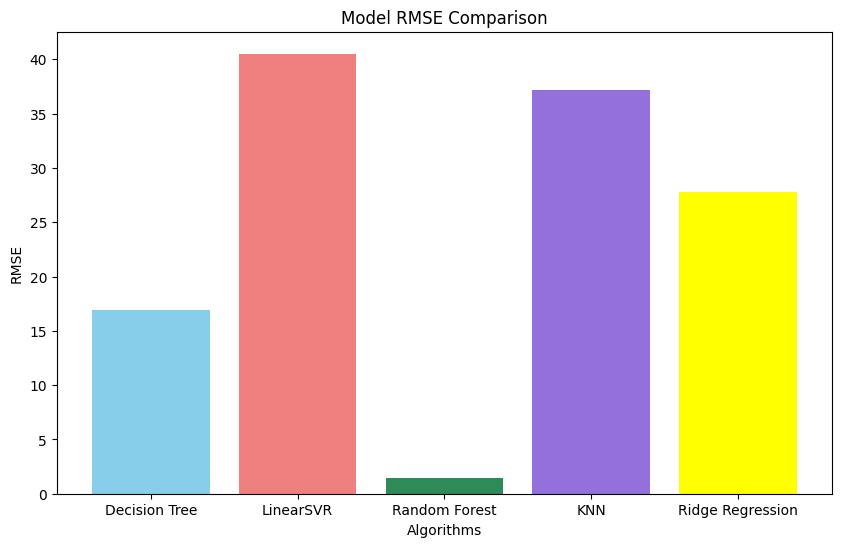

[np.float64(16.95600722430785), np.float64(40.519029742697796), np.float64(1.4496448188835578), np.float64(37.17331996514199), np.float64(27.774628512082792)]


In [107]:
#Visualization for RMSE
plt.figure(figsize=(10, 6))
plt.bar(model_Name, rmse_of_All_Models, color=['skyblue', 'lightcoral', 'seagreen', 'mediumpurple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('RMSE')
plt.title('Model RMSE Comparison')
plt.show()

print(rmse_of_All_Models)

Visualization for MAE

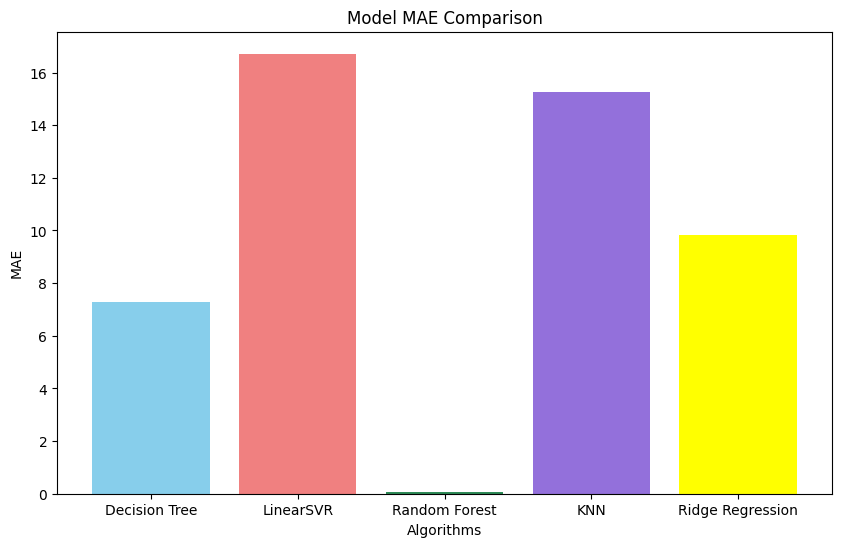

[np.float64(7.2752650255981095), np.float64(16.713639085887014), np.float64(0.05767270402456111), np.float64(15.254806003437562), np.float64(9.83043913832963)]


In [108]:
#Visualization for MAE
plt.figure(figsize=(10, 6))
plt.bar(model_Name, mae_of_All_Models, color=['skyblue', 'lightcoral', 'seagreen', 'mediumpurple', 'yellow'])
plt.xlabel('Algorithms')
plt.ylabel('MAE')
plt.title('Model MAE Comparison')
plt.show()

print(mae_of_All_Models)

#RFM (done)

In [109]:
#Data Preparation for Customer Segmentation Analysis
df = pd.read_csv('onlineRetail.csv')

df['TotalSales'] = df['Quantity'] * df['UnitPrice']

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], format='%d/%m/%Y %H:%M')
df['Year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Day'] = df['InvoiceDate'].dt.day
df['DayOfWeek'] = df['InvoiceDate'].dt.strftime('%A')
df['YearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')

In [110]:
#Find the last purchase date
last_date = df['InvoiceDate'].max()

#Calculate the recency, frequency and monetary
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (last_date - x.max()).days, 
    'InvoiceNo': 'nunique',                             
    'TotalSales': 'sum'                           
}).reset_index()

rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

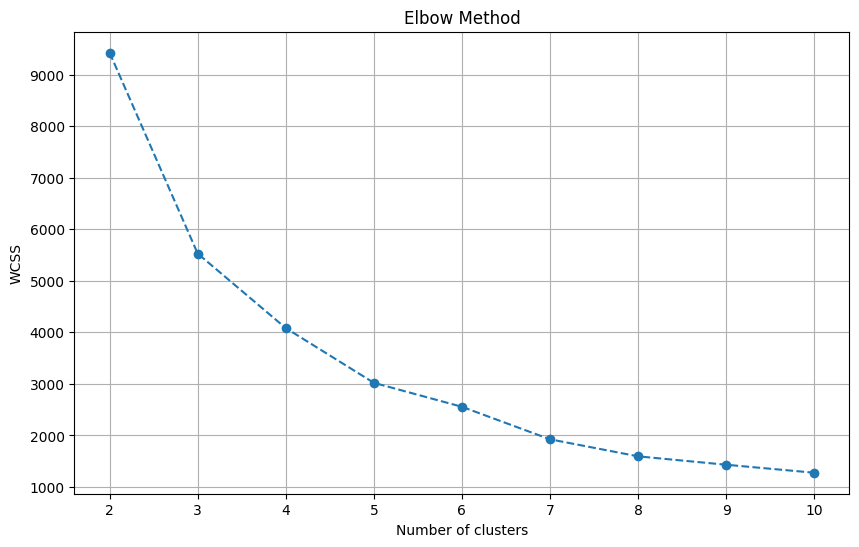

In [111]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

#Select the features for clustering
X = rfm[['Recency', 'Frequency', 'Monetary']]

#Standardize the features (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Determine the optimal number of clusters using the Elbow method
wcss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

#Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

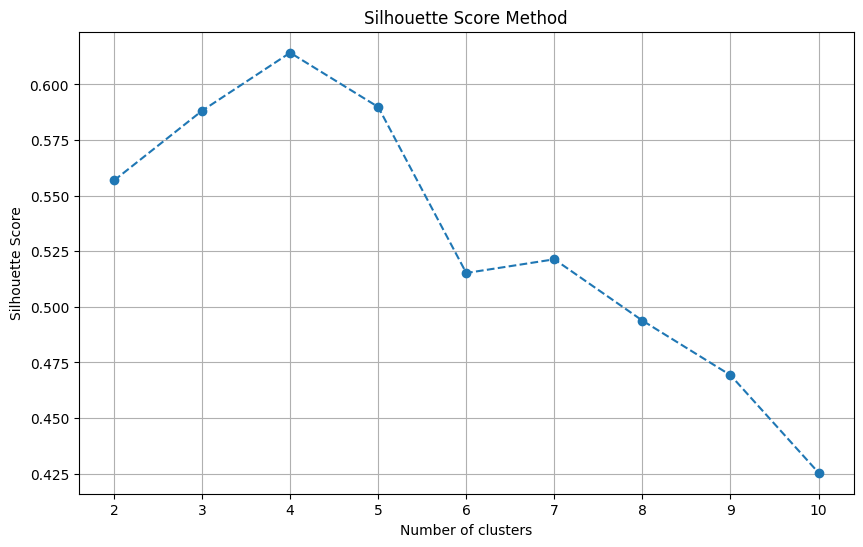

In [112]:
from sklearn.metrics import silhouette_score

#Calculate the Silhouette Scores
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)

#Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score Method')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

In [113]:
import numpy as np

#define the cluster for testing
cluster_range = range(2,11)

#relative change in wcss
wcss_diff = np.diff(wcss) / np.max(wcss)

#normalize the silhouette score
silhouette_scores_norm = (silhouette_scores - np.min(silhouette_scores)) / (np.max(silhouette_scores) - np.min(silhouette_scores))

wcss_diff = np.append(wcss_diff,0)
combined_scores = silhouette_scores_norm - np.abs(wcss_diff)
optimal_clusters = cluster_range[np.argmax(combined_scores)]

print(f"Optimal number of clusters based on combined criteria: {optimal_clusters}")

Optimal number of clusters based on combined criteria: 4


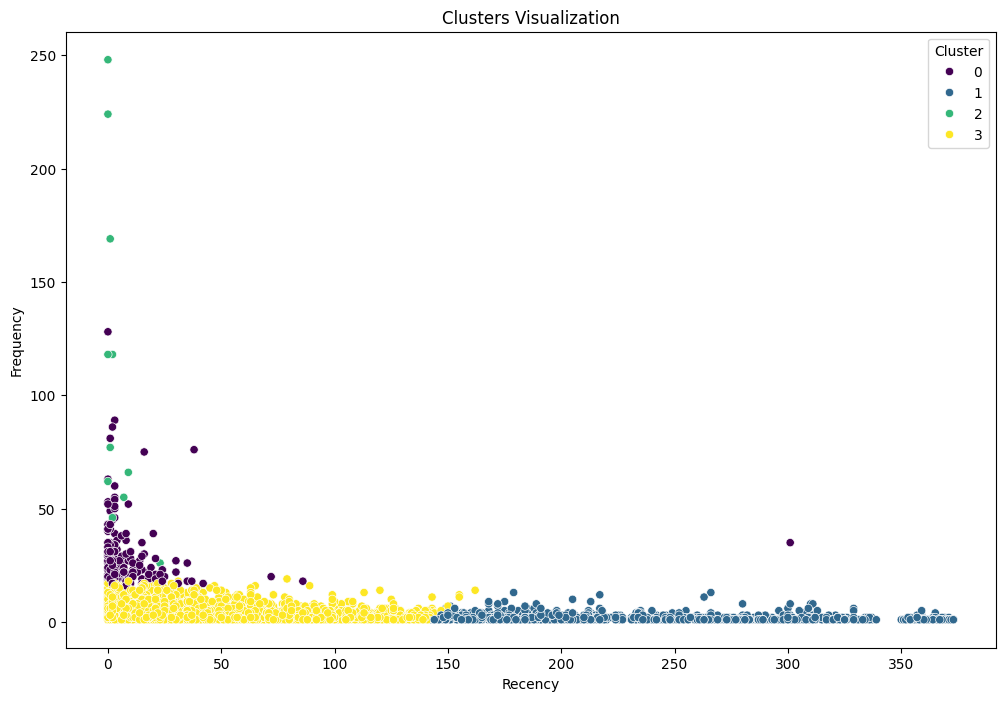

In [114]:
#Fit the K-means with the optimal number of cluster
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(X_scaled)

cluster_summary = rfm.groupby('Cluster').agg({
    'Recency': ['mean', 'std'],
    'Frequency': ['mean', 'std'],
    'Monetary': ['mean', 'std']
}).reset_index()

plt.figure(figsize=(12, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm, palette='viridis')
plt.title('Clusters Visualization')
plt.show()

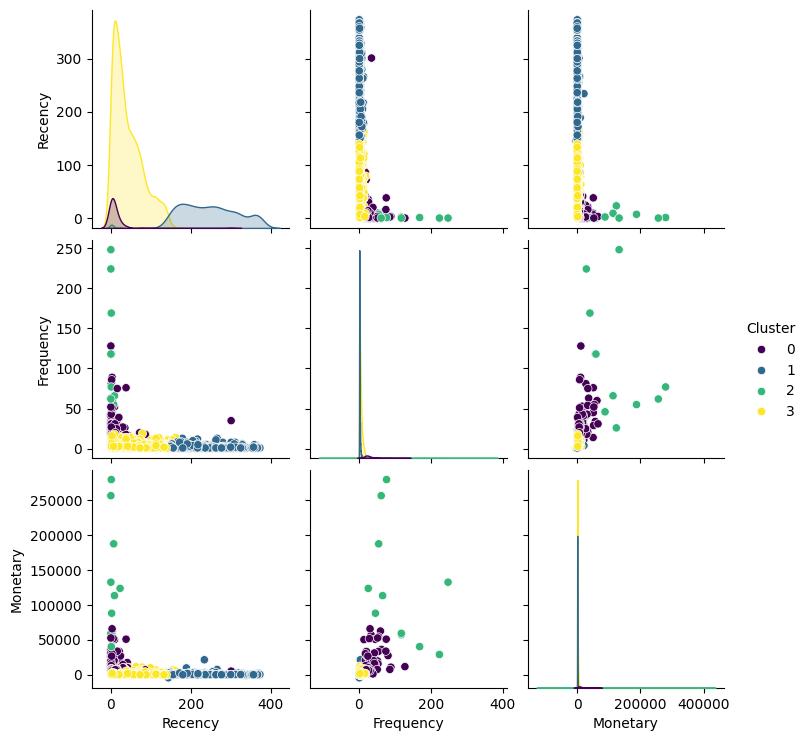

  Cluster     Recency              Frequency                  Monetary  \
                 mean        std        mean        std           mean   
0       0    9.752577  23.982952   28.510309  15.017171   12168.264691   
1       1  247.927577  67.071082    1.805942   1.430692     455.110716   
2       2    4.090909   6.963541  109.909091  74.266351  124312.306364   
3       3   41.780906  36.245015    4.370550   3.591324    1320.981506   

                 
            std  
0  11895.936188  
1    907.428611  
2  84756.843941  
3   1471.360742  


In [115]:
sns.pairplot(rfm, hue='Cluster', vars=['Recency', 'Frequency', 'Monetary'], palette='viridis')
plt.show()

print(cluster_summary)